<a href="https://colab.research.google.com/github/nhjung74/paper/blob/main/factor_rl_portfolio_20250705_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Îî•Îü¨Îãù Ï≤òÎ¶¨ ÌôòÍ≤Ω requirements
g_drive = False
mac_gpu = False
# colab
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
# print(IN_COLAB)

if IN_COLAB:
    print('colab......')
    g_drive = True
    # google drive setting
    #from google.colab import drive
    #drive.mount('/content/drive')
    #import os
    #try:
    #    import transformers, emoji, soynlp, pytorch_lightning
    #except:
    #    ! pip install -U -q transformers emoji soynlp pytorch-lightning snoop wandb sklearn seaborn pandas numpy
    # restart runtime
    #os.kill(os.getpid(), 9)
elif IN_COLAB==False:
    print('not colab')
    g_drive = False
    #import os
    #try:
    #    import transformers, emoji, soynlp, pytorch_lightning
    #except:
    #    ! pip install -U -q transformers emoji soynlp pytorch-lightning snoop wandb sklearn seaborn pandas numpy
    #    ! pip install -q torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

print('g_drive=',g_drive)

colab......
g_drive= True


In [2]:
import platform

platform.system()

'Linux'

In [3]:
os_type = platform.system()

In [4]:
# Os Ï¢ÖÎ•òÎ•º ÌôïÏù∏ÌïúÎã§.
if os_type == 'Darwin':
    mac_gpu = True
else:
    mac_gpu = False
print('mac_gpu=',mac_gpu)

mac_gpu= False


In [5]:
if g_drive == True:
  !pip install --upgrade pip

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.8/1.8 MB 47.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [6]:
if g_drive == True:
  !pip install PyPortfolioOpt

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2/2 [PyPortfolioOpt]


In [7]:
if g_drive == True:
  !pip install shimmy>=0.2.1

In [8]:
if g_drive == True:
  !pip install stable-baselines3

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 965.4/965.4 kB 40.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 45.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 78.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 84.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 27.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 41.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [9]:
# ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄ Î∂àÎü¨Ïò§Í∏∞
import os
import math
import time
import datetime

In [10]:
# Í∏∞Î≥∏ ÎîîÎ†âÌÜ†Î¶¨ ÏÑ§Ï†ï
if g_drive==False:
    from google.colab import drive
    drive.mount('/content/gdrive')
    base_dir = '/content/gdrive/My Drive/Colab Notebooks/aSSIST/factor_Project'
    data_dir = os.path.join(base_dir, 'data')

    # ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ±
    os.makedirs(data_dir, exist_ok=True)

    # Í≤ΩÎ°ú Ïù¥Îèô
    os.chdir(data_dir)

    # Î™®Îç∏ Ï†ÄÏû• ÎîîÎ†âÌÜ†Î¶¨ ÏÑ§Ï†ï
    MODEL_DIR = data_dir  # ÎòêÎäî MODEL_DIR = os.getcwd()

    # Í≤ΩÎ°ú ÌôïÏù∏
    print(f"ÌòÑÏû¨ ÏûëÏóÖ Í≤ΩÎ°ú: {os.getcwd()}")
    print(f"Î™®Îç∏ Ï†ÄÏû• Í≤ΩÎ°ú: {MODEL_DIR}")

In [11]:
start_date ='2019-01-01'
end_date ='2025-06-30'

In [12]:
!ls

'=0.2.1'   sample_data


In [13]:
!pwd

/content


# Ï≤´ Î≤àÏß∏ Ïã§Ìóò (PPO + Crypto + Sharpe Î≥¥ÏÉÅ)

Îã§Ïùå 6Í∞ÄÏßÄ Ïã§ÌóòÏùÑ Ìïú Î≤àÏóê Ïã§ÌñâÌïòÍ≥† Í≤∞Í≥ºÎ•º ÎπÑÍµê

Crypto_PPO_sharpe

Crypto_PPO_beta

Crypto_SAC_sharpe

Crypto_SAC_beta

Crypto_TD3_sharpe

Crypto_TD3_beta

# ÏµúÏ¢ÖÏÜåÏä§ 20250616

In [14]:
import gym
import numpy as np
import pandas as pd
import yfinance as yf
import shap

import matplotlib.pyplot as plt
from gym import spaces
from stable_baselines3 import PPO, SAC, TD3
from stable_baselines3.common.vec_env import DummyVecEnv
import torch
import random
from sklearn.linear_model import LinearRegression  # Ï∂îÍ∞Ä
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from scipy.stats import ttest_ind, mannwhitneyu

from pypfopt import expected_returns, risk_models
from pypfopt.efficient_frontier import EfficientFrontier


In [15]:
# Seed ÏÑ§Ï†ï
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

show_summary = True

In [16]:
# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Ìï®Ïàò (ÏàòÏ†ï: Í±∞ÎûòÎüâ Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä Î∞è Î≤†ÌÉÄ ÌÜµÌï©)
def fetch_data(assets, start=start_date, end=end_date):
    # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú (Ï¢ÖÍ∞Ä + Í±∞ÎûòÎüâ)
    data = yf.download(assets, start=start, end=end, auto_adjust=True, progress=False, threads=False)
    price = data["Close"].ffill().bfill().dropna()
    volume = data["Volume"].ffill().bfill().dropna()

    # Í∏∞Ï°¥ Ìå©ÌÑ∞ Í≥ÑÏÇ∞
    returns = price.pct_change().dropna()
    momentum = price.pct_change(20).dropna()
    volatility = returns.rolling(20).std().dropna()
    factors = pd.concat([momentum.add_suffix("_mom"), volatility.add_suffix("_vol")], axis=1).dropna()

    # ÏãúÍ∞ÑÍ∞ÄÎ≥Ä Î≤†ÌÉÄ Í≥ÑÏÇ∞ (Ï∂îÍ∞Ä)
    beta_df = compute_rolling_beta(price, volume)

    # Ìå©ÌÑ∞ÏôÄ Î≤†ÌÉÄ ÌÜµÌï©
    combined_factors = pd.concat([factors, beta_df], axis=1).dropna()

    # Ïù∏Îç±Ïä§ Ï†ïÎ†¨
    idx = price.index.intersection(combined_factors.index).intersection(returns.index)

    if show_summary:
        df_price = None
        df_returns = None
        df_factors = None

        # Í∏∞Ïà†ÌÜµÍ≥Ñ ÏöîÏïΩ Ï∂úÎ†•
        print("\n[Í∏∞Ïà†ÌÜµÍ≥Ñ ÏöîÏïΩ: Price]")
        print(price.loc[idx].describe().T.round(4))
        df_price = price.loc[idx].describe().T.round(4)
        df_price.to_excel('df_price.xlsx')

        print("\n[Í∏∞Ïà†ÌÜµÍ≥Ñ ÏöîÏïΩ: Returns]")
        print(returns.loc[idx].describe().T.round(4))
        df_returns = returns.loc[idx].describe().T.round(4)
        df_returns.to_excel('df_returns.xlsx')

        print("\n[Í∏∞Ïà†ÌÜµÍ≥Ñ ÏöîÏïΩ: Factors (Momentum, Volatility, Beta Îì±)]")
        print(combined_factors.loc[idx].describe().T.round(4))
        df_factors = combined_factors.loc[idx].describe().T.round(4)
        df_factors.to_excel('df_factors.xlsx')

        # ÌååÏù¥Ïç¨ Í∏∞Ïà†ÌÜµÍ≥Ñ
        print("\n[Í∏∞Ïà†ÌÜµÍ≥Ñ : Prices]")
        print(price.loc[idx].describe())
        print("\n[Í∏∞Ïà†ÌÜµÍ≥Ñ : Returns]")
        print(returns.loc[idx].describe())
        print("\n[Í∏∞Ïà†ÌÜµÍ≥Ñ : Factors]")
        print(combined_factors.loc[idx].describe())


    return price.loc[idx], returns.loc[idx], combined_factors.loc[idx]

In [17]:
# ÏûêÏÇ∞Íµ∞ ÏÑ§Ï†ï
# üìÅ ÎØ∏Íµ≠ Í∞úÎ≥ÑÏ£º (Big Tech + S&P/Dow Ï¢ÖÎ™© Ï§ë ÎåÄÌëú)
stock_assets = [
    "AAPL",  # Apple
    "MSFT",  # Microsoft
    "GOOGL", # Alphabet (Google)
    "AMZN",  # Amazon
    "META",  # Meta (Facebook)
    "TSLA",  # Tesla
    "NVDA",  # Nvidia
    "NFLX",  # Netflix
    "JPM",   # JPMorgan Chase
    "V",     # Visa
    "DIS",   # Disney
    "INTC",  # Intel
    "BA",    # Boeing
    "XOM",   # Exxon Mobil
    "JNJ",   # Johnson & Johnson
    "KO",    # Coca-Cola
    "PG",    # Procter & Gamble
    "WMT",   # Walmart
    "UNH",   # UnitedHealth Group
]

# üìÅ ETF (ÎåÄÌëúÏßÄÏàò ETF)
etf_assets = [
    "SPY",  # S&P 500 ETF
    "QQQ",  # NASDAQ 100 ETF
    "DIA",  # Dow Jones ETF
]

# üìÅ Ìï¥Ïô∏ Ï£ºÏöî Í∞úÎ≥ÑÏ£º (ÎØ∏Íµ≠ Ïô∏ ÏÉÅÏû• Ï¢ÖÎ™©)
equity_assets = [
    "BABA", # Alibaba (NYSE)
    "TSM",  # Taiwan Semiconductor (NYSE/TSMC)
]

# üìÅ ÏïîÌò∏ÌôîÌèê (Crypto Currencies)
crypto_assets = [
    "BTC-USD",  # Bitcoin
    "ETH-USD",  # Ethereum
    "BNB-USD",  # Binance Coin
    "SOL-USD",  # Solana
]


macro_assets = [
    # Ï±ÑÍ∂å Î∞è Í∏àÎ¶¨ Í¥ÄÎ†®
    "TLT",     # iShares 20+ Year Treasury Bond ETF
    "IEF",     # iShares 7-10 Year Treasury Bond ETF
#    "^TNX",    # CBOE 10-Year Treasury Yield Index (ÎØ∏Íµ≠ 10ÎÖÑÎ¨º ÏàòÏùµÎ•†)
#    "^IRX",    # CBOE 13-week Treasury Bill Yield

    # ÏõêÏûêÏû¨ Í¥ÄÎ†®
    "GLD",     # SPDR Gold Shares (Í∏à)
    "SLV",     # iShares Silver Trust (ÏùÄ)
#    "USO",     # United States Oil Fund (ÂéüÊ≤π)
#    "DBB",     # Invesco DB Base Metals Fund (Í∏àÏÜç)
#    "DBC",     # Invesco DB Commodity Index Tracking Fund (Ï¢ÖÌï© ÏõêÏûêÏû¨)

    # Ïù∏ÌîåÎ†àÏù¥ÏÖò Í¥ÄÎ†®
    "TIP",     # iShares TIPS Bond ETF (Î¨ºÍ∞ÄÏó∞ÎèôÏ±Ñ)
]

# üìÅ Ï†ÑÏ≤¥ ÌÜµÌï© ÏûêÏÇ∞Íµ∞
#mixed_assets = stock_assets + etf_assets + equity_assets + crypto_assets + macro_assets
#mixed_assets = ["AAPL","MSFT","TSLA","SPY","BTC-USD","TLT","GLD"]
#mixed_assets = ["IEF","TLT","GLD"]
mixed_assets = stock_assets + etf_assets + equity_assets + crypto_assets + macro_assets
mixed_assets = stock_assets
print(mixed_assets)

['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'NFLX', 'JPM', 'V', 'DIS', 'INTC', 'BA', 'XOM', 'JNJ', 'KO', 'PG', 'WMT', 'UNH']


In [18]:
#show_summary = True

#fetch_data(mixed_assets, start_date, end_date)

In [19]:

def save_model(model, save_path="models", filename="ppo_model.zip"):
    import os
    os.makedirs(save_path, exist_ok=True)
    model.save(os.path.join(save_path, filename))

def load_model(model_class, env, save_path="models", filename="ppo_model.zip"):
    from stable_baselines3.common.vec_env import DummyVecEnv
    return model_class.load(os.path.join(save_path, filename), env=env)


In [20]:
def compare_strategies(series1, series2, label1="A", label2="B"):
    """
    Îëê Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏπò ÏãúÍ≥ÑÏó¥Ïóê ÎåÄÌï¥ t-testÏôÄ Mann‚ÄìWhitney U-test ÏàòÌñâ
    """
    returns1 = series1.pct_change().dropna()
    returns2 = series2.pct_change().dropna()

    # Í∏∏Ïù¥ ÎßûÏ∂îÍ∏∞
    min_len = min(len(returns1), len(returns2))
    returns1 = returns1[-min_len:]
    returns2 = returns2[-min_len:]

    # ÌèâÍ∑†Ï∞®Ïù¥ Í≤ÄÏ†ï (t-test)
    t_stat, t_p = ttest_ind(returns1, returns2, equal_var=False)

    # ÎπÑÎ™®Ïàò Í≤ÄÏ†ï (Mann‚ÄìWhitney U-test)
    u_stat, u_p = mannwhitneyu(returns1, returns2, alternative='two-sided')

    print(f"\nüîé [{label1} vs {label2}]")
    print(f"‚ñ∂ t-test p-value: {t_p:.4f} ‚Üí {'Ïú†ÏùòÎØ∏Ìï®' if t_p < 0.05 else 'Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå'}")
    print(f"‚ñ∂ Mann‚ÄìWhitney U-test p-value: {u_p:.4f} ‚Üí {'Ïú†ÏùòÎØ∏Ìï®' if u_p < 0.05 else 'Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå'}")

    return {
        "t_p": t_p,
        "u_p": u_p
    }

In [21]:
def compute_rolling_beta(price_data: pd.DataFrame, volume_data: pd.DataFrame, window: int = 60) -> pd.DataFrame:
    log_return = np.log(price_data / price_data.shift(1))
    momentum = price_data.pct_change(20)
    volatility_raw = log_return.rolling(20).std()
    volatility_score = 1 / (1 + volatility_raw)

    ma = price_data.rolling(20).mean()
    ma_deviation = (price_data - ma) / ma

    volume_z_raw = (volume_data - volume_data.rolling(20).mean()) / volume_data.rolling(20).std()
    volume_z_score = 1 / (1 + volume_z_raw.abs())

    beta_data = {}
    asset_list = price_data.columns
    n_assets = len(asset_list)

    for asset in asset_list:
        asset_df = pd.DataFrame({
            "y": log_return[asset],
            "momentum": momentum[asset],
            "volatility": volatility_score[asset],
            "ma_dev": ma_deviation[asset],
            "volume_z": volume_z_score[asset]
        }).dropna()

        betas = []
        index_list = []

        for i in range(window, len(asset_df)):
            y = asset_df["y"].iloc[i - window:i].values
            X = asset_df[["momentum", "volatility", "ma_dev", "volume_z"]].iloc[i - window:i].values
            price_window = price_data[asset].iloc[i - window:i]
            returns = price_window.pct_change().dropna()

            if np.any(np.isnan(X)) or np.any(np.isnan(y)) or returns.empty:
                betas.append([np.nan] * 7)
                index_list.append(asset_df.index[i])
                continue

            reg = LinearRegression().fit(X, y)
            sharpe = returns.mean() / (returns.std() + 1e-6)
            cumulative = (1 + returns).cumprod()
            peak = cumulative.cummax()
            drawdown = (cumulative - peak) / peak
            mdd = drawdown.min()
            beta_mdd = 1 - abs(mdd)

            # EqualWeight Ïú†ÏÇ¨ÎèÑ (Í∞ÄÍ≤© Í∏∞Î∞ò)
            weights_price = price_data.iloc[i - 1] / price_data.iloc[i - 1].sum()
            eqw = 1 / n_assets
            eqw_similarity_price = 1 - abs(weights_price[asset] - eqw)  # 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù EWÏóê Ïú†ÏÇ¨

            # EqualWeight Ïú†ÏÇ¨ÎèÑ (Ï†ïÏ±Ö Í∏∞Î∞ò)
            action_t = np.zeros(n_assets)
            action_t[list(price_data.columns).index(asset)] = 1.0  # Îã®Ïùº ÏûêÏÇ∞ Ìà¨Ïûê Í∞ÄÏ†ï
            weights_eqw = np.ones(n_assets) / n_assets
            eqw_similarity_policy = 1 - np.linalg.norm(action_t - weights_eqw)

            # Ìå©ÌÑ∞ Ï†ÄÏû•
            betas.append(list(reg.coef_) + [sharpe, beta_mdd, eqw_similarity_price, eqw_similarity_policy])
            index_list.append(asset_df.index[i])

        # Ïª¨ÎüºÎ™ÖÏùÑ Ïñ∏ÎçîÏä§ÏΩîÏñ¥Î°ú Î≥ÄÍ≤Ω
        beta_df = pd.DataFrame(
            betas,
            columns=[
                f"{asset}_beta_mom", f"{asset}_beta_vol", f"{asset}_beta_ma", f"{asset}_beta_volz",
                f"{asset}_beta_sharpe", f"{asset}_beta_mdd",
                f"{asset}_beta_eqw_price", f"{asset}_beta_eqw_policy"
            ],
            index=index_list
        )
        beta_data[asset] = beta_df

    beta_panel = pd.concat(beta_data, axis=1)
    #beta_panel.columns = [f"{a}_{b}" for a, b in beta_panel.columns]  # ‚úÖ Ïó¨Í∏∞ Ï∂îÍ∞Ä
    beta_panel.columns = [b for a, b in beta_panel.columns]
    beta_panel.index.name = "Date"
    return beta_panel


In [22]:
def equal_weight_backtest(price, transaction_cost=0.001):
    """
    Îß§Ïùº Î¶¨Î∞∏Îü∞Ïã± + ÏàòÏàòÎ£å Î∞òÏòÅ + ÏûêÏÇ∞ Î≥¥Ïú†Îüâ Í∏∞Î∞ò Î∞±ÌÖåÏä§Ìä∏
    """
    returns = price.pct_change().dropna()
    n_assets = returns.shape[1]
    weights = np.ones(n_assets) / n_assets
    portfolio_values = []
    asset_quantity = np.zeros(n_assets)
    cash = 1000000  # Ï¥àÍ∏∞ ÏûêÎ≥∏

    for t in range(1, len(returns)):
        prices_today = price.iloc[t - 1].values
        total_value = cash + np.sum(asset_quantity * prices_today)

        desired_value = total_value * weights
        current_value = asset_quantity * prices_today
        trade_value = desired_value - current_value

        turnover = np.sum(np.abs(trade_value))
        cost = turnover * transaction_cost

        # Í±∞Îûò Î∞òÏòÅ
        net_trade_value = trade_value - np.sign(trade_value) * cost / n_assets
        asset_quantity += net_trade_value / prices_today
        cash = total_value - np.sum(asset_quantity * prices_today) - cost

        # ÌïòÎ£® ÌõÑ Í∞ÄÏπò Í≥ÑÏÇ∞
        prices_next = price.iloc[t].values
        portfolio_value = cash + np.sum(asset_quantity * prices_next)
        portfolio_values.append(portfolio_value)

    return pd.Series(portfolio_values, index=returns.index[1:])

In [23]:
def mvp_daily_rebalancing(price, lookback=60, transaction_cost=0.001):
    """
    MVP Ï†ÑÎûµ Í∏∞Î∞ò ÏùºÏùº Î¶¨Î∞∏Îü∞Ïã± Î∞±ÌÖåÏä§Ìä∏ (Ï†ïÌôïÌïú Î¶¨Î∞∏Îü∞Ïã± Î∞òÏòÅ)
    """
    returns = price.pct_change().dropna()
    portfolio_values = []
    asset_quantity = np.zeros(len(price.columns))
    cash = 1000000

    for t in range(lookback, len(price) - 1):
        window_price = price.iloc[t - lookback:t]
        price_today = price.iloc[t].values

        try:
            mu = expected_returns.mean_historical_return(window_price, frequency=252)
            S = risk_models.sample_cov(window_price, frequency=252)
            ef = EfficientFrontier(mu, S)
            ef.min_volatility()
            weights = ef.clean_weights()
            w = np.array([weights.get(ticker, 0.0) for ticker in price.columns])
        except:
            w = np.ones(len(price.columns)) / len(price.columns)

        total_value = cash + np.sum(asset_quantity * price_today)

        desired_value = w * total_value
        current_value = asset_quantity * price_today
        trade_value = desired_value - current_value

        # ÏàòÏàòÎ£å Í≥ÑÏÇ∞ Î∞è Î∞òÏòÅ
        turnover = np.sum(np.abs(trade_value))
        cost = turnover * transaction_cost

        asset_quantity += trade_value / price_today
        cash = total_value - np.sum(asset_quantity * price_today) - cost

        # Îã§Ïùå ÎÇ† Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏπò
        price_next = price.iloc[t + 1].values
        portfolio_value = cash + np.sum(asset_quantity * price_next)

        portfolio_values.append(portfolio_value)

    index = price.index[lookback + 1:]
    return pd.Series(portfolio_values, index=index)

In [24]:
def check_price_format(price: pd.DataFrame, plot_sample: bool = True, verbose: bool = True) -> str:
    """
    Í∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞Ïùò ÌòïÏãùÏùÑ ÌåêÎã®Ìï©ÎãàÎã§: 'raw_price', 'cumulative_return', 'return'
    - plot_sample: TrueÏùº Í≤ΩÏö∞ ÏÉòÌîå ÏûêÏÇ∞Ïùò Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑÎ•º Ï∂úÎ†•
    - verbose: TrueÏùº Í≤ΩÏö∞ ÌÜµÍ≥Ñ Ï†ïÎ≥¥Î•º Ï∂úÎ†•
    """
    price = price.dropna()
    mean_val = price.mean().mean()
    std_val = price.std().mean()
    min_val = price.min().min()
    max_val = price.max().max()

    # ÌåêÎã® Í∏∞Ï§Ä
    if (min_val > 10) and (std_val > 5):
        format_type = "raw_price"
    elif (min_val > 0.5) and (max_val < 2.0) and (std_val > 0.01):
        format_type = "cumulative_return"
    elif (mean_val < 0.05) and (std_val < 0.1):
        format_type = "return"
    else:
        format_type = "ambiguous"

    if verbose:
        print(f"‚ñ∂ ÌèâÍ∑†: {mean_val:.4f}, ÌëúÏ§ÄÌé∏Ï∞®: {std_val:.4f}, ÏµúÏÜåÍ∞í: {min_val:.4f}, ÏµúÎåÄÍ∞í: {max_val:.4f}")
        print(f"‚Üí ÌåêÎã®Îêú ÌòïÏãù: {format_type}")

    if plot_sample:
        sample_asset = price.columns[0]
        price[sample_asset].plot(title=f"Sample Asset: {sample_asset} ({format_type})", figsize=(10, 4))
        plt.xlabel("Date")
        plt.ylabel("Value")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return format_type

def equal_weight_buy_and_hold(price: pd.DataFrame, transaction_cost: float = 0.001) -> pd.Series:
    """
    Equal Weight Buy & Hold Ï†ÑÎûµ (Î¶¨Î∞∏Îü∞Ïã± ÏóÜÏùå)
    - Ï¥àÍ∏∞ ÏûêÏÇ∞ÏùÑ ÎèôÏùº ÎπÑÏ§ëÏúºÎ°ú Í∞Å ÏûêÏÇ∞Ïóê Î∂ÑÎ∞∞ ÌõÑ Î≥¥Ïú†
    - ÏàòÏàòÎ£åÎäî ÏµúÏ¥à Îß§Ïàò ÏãúÏ†êÏóêÎßå Ï†ÅÏö©
    """
    # Í∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†úÎåÄÎ°ú ÎêòÏñ¥ ÏûàÎäîÏßÄ ÌôïÏù∏
    format_type = check_price_format(price)
    print(format_type)

    n_assets = price.shape[1]
    price = price.dropna()
    start_price = price.iloc[0].values

    weights = np.ones(n_assets) / n_assets
    total_value = 1.0
    turnover = np.sum(np.abs(weights * total_value))
    cost = turnover * transaction_cost
    effective_value = total_value - cost

    # Ï¥àÍ∏∞ Îß§Ïàò
    desired_value = weights * effective_value
    asset_quantity = desired_value / start_price

    portfolio_values = []
    for t in range(len(price)):
        price_today = price.iloc[t].values
        port_val = np.sum(asset_quantity * price_today)
        portfolio_values.append(port_val)

    return pd.Series(portfolio_values, index=price.index)

In [25]:
# ÏÑ±Í≥º ÏßÄÌëú Í≥ÑÏÇ∞ (ÏàòÏ†ï: Ïò¨Î∞îÎ•∏ Ïó∞Í∞ÑÌôî Í≥ÑÏÇ∞)
# ÏÑ±Í≥º ÏßÄÌëú Í≥ÑÏÇ∞
def performance_metrics(series):
    returns = series.pct_change().dropna()
    cumulative_return = series.iloc[-1] / series.iloc[0] - 1
    annualized_return = (series.iloc[-1] / series.iloc[0]) ** (252 / len(series)) - 1
    cagr = annualized_return  # Ï§ëÎ≥µ Ï†úÍ±∞
    annualized_vol = returns.std() * np.sqrt(252)
    sharpe = (cagr - 0.0) / (annualized_vol + 1e-6)
    downside_std = returns[returns < 0].std() * np.sqrt(252)
    sortino = (cagr - 0.0) / (downside_std + 1e-6)
    peak = series.cummax()
    drawdown = (series - peak) / peak
    mdd = drawdown.min()
    mdd = drawdown.min()
    if len(returns) == 0:
        turnover = 0.0
    else:
        turnover = (np.abs(returns).sum()) / len(returns)

    return {
        "Sharpe Ratio": sharpe,
        "Sortino Ratio": sortino,
        "Cumulative Return": cumulative_return,
        "Annualized Return": cagr,
        "Annualized Volatility": annualized_vol,
        "CAGR": cagr,
        "Maximum Drawdown": mdd,
        "Turnover Ratio": turnover
    }

In [26]:
import gym
from gym import spaces
import numpy as np
import pandas as pd
from gym.utils import seeding  # ‚úÖ Ïù¥ Ï§ÑÏùÑ Î∞òÎìúÏãú Ï∂îÍ∞ÄÌï¥Ïïº Ìï®

TRANSACTION_FEE_PERCENT = 0.001
INITIAL_ACCOUNT_BALANCE = 1000000
HMAX_NORMALIZE = 10

class PPOPortfolioEnv(gym.Env):
    def __init__(self, returns, factors, price, objective="sharpe"):
        self.returns = returns
        self.factors = factors
        self.price = price
        self.df = price  # ‚úÖ self.df Ï†ïÏùò (ÏïÑÎûòÏóêÏÑú dayÎ°ú Ïù∏Îç±Ïã±Ìï† ÎåÄÏÉÅ)
        self.objective = objective

        self.stock_dim = self.returns.shape[1]
        self.day = 0
        self.terminal = False

        self.action_space = spaces.Box(low=-1, high=1, shape=(self.stock_dim,))
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(2*self.stock_dim+1,))

        self.state = [INITIAL_ACCOUNT_BALANCE] + self.price.iloc[self.day].tolist() + [0]*self.stock_dim
        self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
        self.portfolio_returns = []
        self.actions_memory = [[1/self.stock_dim]*self.stock_dim]
        self.portfolio_value = [INITIAL_ACCOUNT_BALANCE]


        self._seed()

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def _normalize(self, weights):
        norm = np.sum(weights)
        return weights / (norm + 1e-15)

    def _calculate_portfolio_value(self):
        return self.state[0] + sum(
            np.array(self.state[1:self.stock_dim+1]) * np.array(self.state[self.stock_dim+1:])
        )

    def _calculate_reward(self, begin_val, end_val):
        ret = (end_val - begin_val) / (begin_val + 1e-8)
        self.portfolio_returns.append(ret)

        if self.objective == "sharpe":
            if len(self.portfolio_returns) > 20:
                mean_ret = np.mean(self.portfolio_returns)
                std_ret = np.std(self.portfolio_returns)
                return mean_ret / (std_ret + 1e-6)
            elif len(self.portfolio_returns) > 1:
                return np.prod(1 + np.array(self.portfolio_returns)) - 1
            else:
                return 0
        elif self.objective == "return":
            return ret
        else:
            return 0

    def _sell_stock(self, index, action):
        action = np.floor(action)
        if self.state[index + self.stock_dim + 1] > 0:
            sell_amount = min(abs(action), self.state[index + self.stock_dim + 1])
            self.state[0] += self.state[index + 1] * sell_amount * (1 - TRANSACTION_FEE_PERCENT)
            self.state[index + self.stock_dim + 1] -= sell_amount

    def _buy_stock(self, index, action):
        action = np.floor(action)
        cost = self.state[index + 1] * action * (1 + TRANSACTION_FEE_PERCENT)
        if self.state[0] >= cost:
            self.state[0] -= cost
            self.state[index + self.stock_dim + 1] += action

    #ÏÉ§ÌîÑÏßÄÏàò Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú Ìï®Ïàò
    def _calculate_sharpe_ratio(self, begin_portfolio_value,end_portfolio_value):
        #print('_calculate_sharpe_ratio')
        returns = np.array([begin_portfolio_value, end_portfolio_value])
        returns = returns[~np.isnan(returns)]  # NaN Í∞íÏùÑ Ï†úÍ±∞
        if len(returns) == 0:
            returns = np.array([0.0])  # Î≥ÄÎèôÏÑ±Ïù¥ 0Ïù∏ Í≤ΩÏö∞ ÎåÄÎπÑ

        risk_free_rate = 0.02  # ÌïÑÏöîÌïú Í∞íÏúºÎ°ú ÏÑ§Ï†ïÌïòÏÑ∏Ïöî

        returns_tensor = torch.tensor(returns)  # numpy Î∞∞Ïó¥ÏùÑ ÌÜ†Ïπò ÌÖêÏÑúÎ°ú Î≥ÄÌôò
        mean_return = returns_tensor.mean()
        std_return = returns_tensor.std()

        # ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 0Ïù∏ Í≤ΩÏö∞ ÎåÄÎπÑÌïòÏó¨ 0Ïù¥ ÏïÑÎãå Í∞íÏùÑ ÏÇ¨Ïö©
        std_return = max(std_return, 1e-6)

        # Î∂ÑÎ™®Í∞Ä 0Ïù∏ Í≤ΩÏö∞Ïóê ÎåÄÌïú Ï≤òÎ¶¨ Ï∂îÍ∞Ä
        if std_return > 0:
            sharpe_ratio = (mean_return - risk_free_rate) / std_return
            sharpe_ratio = sharpe_ratio.item()
            #print('sharpe_ratio=',sharpe_ratio)
        else:
            sharpe_ratio = 0.0  # ÌòπÏùÄ ÏõêÌïòÎäî Îã§Î•∏ Í∞íÏùÑ ÏÇ¨Ïö©

        return sharpe_ratio

    # ÏÜåÎ•¥Ìã∞ÎÖ∏ ÏßÄÏàò Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú Ìï®Ïàò
    def _calculate_sortino_ratio(self, begin_portfolio_value,end_portfolio_value):
        #print('_calculate_sortino_ratio')
        returns = np.array([begin_portfolio_value, end_portfolio_value])
        returns = returns[~np.isnan(returns)]  # NaN Í∞íÏùÑ Ï†úÍ±∞

        if len(returns) == 0:
            returns = np.array([0.0])  # Î≥ÄÎèôÏÑ±Ïù¥ 0Ïù∏ Í≤ΩÏö∞ ÎåÄÎπÑ

        risk_free_rate = 0.02

        returns_tensor = torch.tensor(returns)  # numpy Î∞∞Ïó¥ÏùÑ ÌÜ†Ïπò ÌÖêÏÑúÎ°ú Î≥ÄÌôò
        mean_return = returns_tensor.mean()

        downside_returns = returns[returns < risk_free_rate]
        downside_returns_tensor = torch.tensor(downside_returns)  # numpy Î∞∞Ïó¥ÏùÑ ÌÜ†Ïπò ÌÖêÏÑúÎ°ú Î≥ÄÌôò

        if len(downside_returns) == 0:
            downside_deviation = 0.0
        else:
            downside_deviation = downside_returns_tensor.std()

        # ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 0Ïù∏ Í≤ΩÏö∞ ÎåÄÎπÑÌïòÏó¨ 0Ïù¥ ÏïÑÎãå Í∞íÏùÑ ÏÇ¨Ïö©
        downside_deviation = max(downside_deviation, 1e-6)

        if downside_deviation > 0.0:
            #print('mean_return=',mean_return, 'risk_free_rate=',risk_free_rate, 'downside_deviation=',downside_deviation)
            sortino_ratio = (mean_return - risk_free_rate) / downside_deviation
            #print('sortino_ratio=',sortino_ratio)
            sortino_ratio = sortino_ratio.item()
        else:
            sortino_ratio = 0.0

        return sortino_ratio

    # tangent portfolio
    def _calculate_tangent_portfolio_reward(self, begin_portfolio_value, end_portfolio_value):
        reward = 0.0

        return reward

    # ‚úÖ Í≥µÌÜµ Ïú†Ìã∏: Î≤†ÌÉÄ Ï†êÏàò Í≥ÑÏÇ∞ Î∞è Î≥¥ÏÉÅ Î∞òÌôò

    def _calculate_beta_reward(self, predicted_weights, factor_type, negate=False):
        idx = max(self.day - 1, 0)
        beta_scores = []
        for asset in self.price.columns:
            col_name = f"{asset}_{factor_type}"
            beta_value = self.factors.iloc[idx].get(col_name, 0)
            beta_scores.append(beta_value)

        beta_scores = np.array(beta_scores)
        predicted_weights = self._normalize(predicted_weights)
        reward = np.dot(predicted_weights, beta_scores)
        return -reward if negate else reward

    def _calculate_multi_beta_reward(self, predicted_weights):
        idx = max(self.day - 1, 0)  # ÎòêÎäî self.current_step - 1, Îëò Ï§ë Ïã§Ï†ú ÌÅ¥ÎûòÏä§Ïóê ÎßûÎäî Ïù¥Î¶Ñ ÏÇ¨Ïö©
        beta_scores = []
        beta_factors = {
            "mom": +1,
            "vol": -1,
            "ma": +1,
            "volz": -1,
            "sharpe": +1,
            "mdd": +1,               # drawdown Ï†ÅÏùÑÏàòÎ°ù Ï¢ãÏúºÎÇò betaÎäî 1-|MDD| ÌòïÌÉúÎ°ú ÎêòÏñ¥ ÏûàÏúºÎØÄÎ°ú +1 Ïú†ÏßÄ
            "eqw_price": -1,         # price ÎπÑÏ§ëÏù¥ EWÏóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Ï¢ãÎã§Î©¥ ‚Üí -1 (Ìé∏Ï∞® ÏûëÏùÑÏàòÎ°ù)
            "eqw_policy": -1         # actionÏù¥ EWÏóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Ï¢ãÎã§Î©¥ ‚Üí -1
        }

        for asset in self.price.columns:  # ÎòêÎäî self.assets ÏÇ¨Ïö©
            beta_total = 0
            found_factors = 0
            for factor_name, direction in beta_factors.items():
                col_name = f"{asset}_beta_{factor_name}"
                if col_name in self.factors.columns:
                    beta_val = self.factors.iloc[idx].get(col_name, 0)
                    beta_total += direction * beta_val
                    found_factors += 1
                else:
                    print(f"[Í≤ΩÍ≥†] ÎàÑÎùΩÎêú Ìå©ÌÑ∞: {col_name}")

            if found_factors > 0:
                beta_scores.append(beta_total / found_factors)
            else:
                beta_scores.append(0.0)

        beta_scores = np.array(beta_scores)
        predicted_weights = self._normalize(predicted_weights)
        reward = np.dot(predicted_weights, beta_scores)

        return reward

    def _calculate_p_adaptive_reward(self, predicted_weights):
        idx = max(self.day - 1, 0)
        factor_list = ["mom", "vol", "ma", "volz", "sharpe", "mdd", "eqw_price", "eqw_policy"]
        current_scores = []
        eqw_scores = []

        for factor in factor_list:
            current_score = 0.0
            eqw_score = 0.0
            count = 0

            for i, asset in enumerate(self.price.columns):  # ÎòêÎäî self.assets ÏÇ¨Ïö©
                col_name = f"{asset}_beta_{factor}"
                if col_name in self.factors.columns:
                    beta_val = self.factors.iloc[idx].get(col_name, 0)
                    current_score += predicted_weights[i] * beta_val
                    eqw_score += (1.0 / self.stock_dim) * beta_val
                    count += 1

            if count > 0:
                current_scores.append(current_score / count)
                eqw_scores.append(eqw_score / count)

        avg_current_score = np.mean(current_scores)
        avg_eqw_score = np.mean(eqw_scores)

        reward = avg_current_score if avg_current_score >= avg_eqw_score else avg_eqw_score

        return reward


    # Î¶¨ÏõåÎìú Í≥ÑÏÇ∞ Î∞è Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ï°∞Ï†ï
    def _execute_trades(self, predicted_weights, begin_portfolio_value,end_portfolio_value):
        #print('_execute_trades')
        # ÏòàÏ∏°Îêú ÎπÑÏ§ëÏóê Îî∞Îùº Ï£ºÏãù ÏÇ¨Í≥† ÌåîÍ∏∞
        for index, weight in enumerate(predicted_weights):
            if weight > 0:  # ÏÇ¨Ïïº Ìï† Í≤ΩÏö∞
                self._buy_stock(index, weight)
            elif weight < 0:  # ÌåîÏïÑÏïº Ìï† Í≤ΩÏö∞
                self._sell_stock(index, abs(weight))

        # reward_typeÏù¥ 1Ïù¥Î©¥ ÏÉ§ÌîÑ ÏßÄÏàò ÏµúÎåÄÌôî
        if self.objective == "sharpe":
           reward = self._calculate_sharpe_ratio(begin_portfolio_value,end_portfolio_value)
        # reward_typeÏù¥ 2Ïù¥Î©¥ ÏÜåÎ•¥Ìã∞ÎÖ∏ ÏßÄÏàò ÏµúÎåÄÌôî
        elif self.objective == "sortino":
           reward = self._calculate_sortino_ratio(begin_portfolio_value,end_portfolio_value)
           #print("self.reward_type..",self.reward_type,"reward=",reward)
        # reward_type Ïù¥ 5Ïù∏Í≤ΩÏö∞ tangent portfolio ÎπÑÏ§ëÏùÑ Íµ¨ÌïòÎèÑÎ°ù
        elif self.objective == "tangent":
           reward = self._calculate_tangent_portfolio_reward(begin_portfolio_value,end_portfolio_value)
        elif self.objective == "beta_mom":
            reward = self._calculate_beta_reward(predicted_weights, "beta_mom")
        elif self.objective == "beta_vol":
            reward = self._calculate_beta_reward(predicted_weights, "beta_vol", negate=True)
        elif self.objective == "beta_ma":
            reward = self._calculate_beta_reward(predicted_weights, "beta_ma", negate=True)
        elif self.objective == "beta_sharpe":
            reward = self._calculate_beta_reward(predicted_weights, "beta_sharpe")
        elif self.objective == "beta_volz":
            reward = self._calculate_beta_reward(predicted_weights, "beta_volz")
        elif self.objective == "beta_mdd":
            reward = self._calculate_beta_reward(predicted_weights, "beta_mdd")
        elif self.objective == "beta_eqw_price":
            reward = self._calculate_beta_reward(predicted_weights, "beta_eqw_price")
        elif self.objective == "beta_eqw_policy":
            reward = self._calculate_beta_reward(predicted_weights, "beta_eqw_policy")
        elif self.objective == "multi_beta":
            reward = self._calculate_multi_beta_reward(predicted_weights)
        elif self.objective == "p_adaptive":
            reward = self._calculate_p_adaptive_reward(predicted_weights)

        else :
           #print("reward Error")
           reward = 0.0

        # Î≥¥ÏÉÅ Í≥ÑÏÇ∞: ÎÅù Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏÉ§ÌîÑÍ∞í - ÏãúÏûë Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏÉ§ÌîÑÍ∞í
        self.reward = reward

        return self.reward

    def step(self, actions):
        self.terminal = self.day >= len(self.df.index.unique()) - 1

        if self.terminal:
            return self.state, self.reward, self.terminal, {}

        actions = actions * HMAX_NORMALIZE

        begin_total_asset = self.state[0] + sum(
            np.array(self.state[1:(self.stock_dim+1)]) *
            np.array(self.state[(self.stock_dim+1):(self.stock_dim*2+1)])
        )

        argsort_actions = np.argsort(actions)
        sell_index = argsort_actions[:np.where(actions < 0)[0].shape[0]]
        buy_index = argsort_actions[::-1][:np.where(actions > 0)[0].shape[0]]

        for index in sell_index:
            self._sell_stock(index, actions[index])

        for index in buy_index:
            self._buy_stock(index, actions[index])

        self.day += 1
        self.data = self.df.iloc[self.day, :]

        self.state = [self.state[0]] + self.data.values.tolist() + \
                    list(self.state[(self.stock_dim+1):(self.stock_dim*2+1)])

        end_total_asset = self.state[0] + sum(
            np.array(self.state[1:(self.stock_dim+1)]) *
            np.array(self.state[(self.stock_dim+1):(self.stock_dim*2+1)])
        )

        reward = self._execute_trades(actions, begin_total_asset, end_total_asset)
        self.reward += reward

        self.portfolio_value.append(end_total_asset)

        weights = self.normalization(np.array(self.state[(self.stock_dim+1):(self.stock_dim*2+1)]))
        self.actions_memory.append(weights.tolist())

        return self.state, self.reward, self.terminal, {}


    def reset(self):
        self.day = 0
        self.state = [INITIAL_ACCOUNT_BALANCE] + self.price.iloc[self.day].tolist() + [0]*self.stock_dim
        self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
        self.portfolio_returns = []
        self.actions_memory = [[1/self.stock_dim]*self.stock_dim]
        self.portfolio_value = [INITIAL_ACCOUNT_BALANCE]
        return np.array(self.state)

    def render(self, mode="human", close=False):
        return self.state

    def save_action_memory(self):
        return self.actions_memory

    def normalization(self, actions):
        #print('normalization')
        output = actions/(np.sum(actions)+1e-15)
        return output


In [27]:
from stable_baselines3.common.vec_env import DummyVecEnv

# ÌõàÎ†® Î∞è ÌèâÍ∞Ä Ìï®Ïàò
def train_and_evaluate(assets, algo_class, objective="sharpe"):
    price, returns, factors = fetch_data(assets)

    # Î≤†Ïù¥Ïä§ÎùºÏù∏ Ï†ÑÎûµ
    if algo_class is None:
        if objective == "equal_weights":
            return equal_weight_backtest(price[assets], transaction_cost=0.001)
        elif objective == "mvp":
            return mvp_daily_rebalancing(price[assets], lookback=60, transaction_cost=0.001)
        elif objective == "buy_and_hold":
            return equal_weight_buy_and_hold(price[assets], transaction_cost=0.001)
        else:
            return None

    # DRL ÌïôÏäµ ÌôòÍ≤Ω
    env_train = DummyVecEnv([lambda: PPOPortfolioEnv(returns, factors, price, objective)])
    model = algo_class("MlpPolicy", env_train, verbose=0, seed=SEED)
    model.learn(total_timesteps=50000)

    # DRL ÌèâÍ∞Ä ÌôòÍ≤Ω (Îã®Ïùº Ïù∏Ïä§ÌÑ¥Ïä§ ÏÇ¨Ïö©)
    env_eval = PPOPortfolioEnv(returns, factors, price, objective)
    obs = env_eval.reset()
    done = False

    while not done:
        action, _ = model.predict(obs)
        obs, reward, done, _ = env_eval.step(action)

    # Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏπò ÏãúÍ≥ÑÏó¥ Î∞òÌôò
    values = env_eval.portfolio_value
    index = price.index[:len(values)]
    return pd.Series(values, index=index)


In [28]:
# Ïã§Ìóò Íµ¨ÏÑ±
stock_experiments = [
    ("Stock", stock_assets, "EqualWeight", None, "equal_weights"),
#    ("Mixed", mixed_assets, "BuyandHold", None, "buy_and_hold"),
    ("Stock", stock_assets, "MeanVariance", None, "mvp"),
    ("Stock", stock_assets, "PPO", PPO, "sharpe"),
#    ("Mixed", mixed_assets, "PPO", PPO, "beta_eqw_price"),
#    ("Mixed", mixed_assets, "PPO", PPO, "beta_eqw_policy"),
#    ("Mixed", mixed_assets, "PPO", PPO, "eqw_hybrid"),
    ("Stock", stock_assets, "PPO", PPO, "beta_mom"),
#    ("Mixed", mixed_assets, "PPO", PPO, "beta_vol"),
#    ("Mixed", mixed_assets, "PPO", PPO, "beta_ma"),
#    ("Mixed", mixed_assets, "PPO", PPO, "beta_volz"),
#    ("Mixed", mixed_assets, "PPO", PPO, "beta_sharpe"),
#    ("Mixed", mixed_assets, "PPO", PPO, "beta_mdd"),
    ("Stock", stock_assets, "PPO", PPO, "beta_eqw_price"),
    ("Stock", stock_assets, "PPO", PPO, "beta_eqw_policy"),
#    ("Mixed", mixed_assets, "PPO", PPO, "adaptive"),
    ("Stock", stock_assets, "PPO", PPO, "p_adaptive"),
#    ("Mixed", mixed_assets, "PPO", PPO, "p_adaptive_sharpe"),

    ("Stock", stock_assets, "PPO", PPO, "multi_beta"),

]

# Ïã§Ìóò Íµ¨ÏÑ±
Crypto_experiments = [
    ("Crypto", crypto_assets, "EqualWeight", None, "equal_weights"),
#    ("Mixed", mixed_assets, "BuyandHold", None, "buy_and_hold"),
    ("Crypto", crypto_assets, "MeanVariance", None, "mvp"),
    ("Crypto", crypto_assets, "PPO", PPO, "sharpe"),
#    ("Mixed", mixed_assets, "PPO", PPO, "beta_eqw_price"),
#    ("Mixed", mixed_assets, "PPO", PPO, "beta_eqw_policy"),
#    ("Mixed", mixed_assets, "PPO", PPO, "eqw_hybrid"),
    ("Crypto", crypto_assets, "PPO", PPO, "beta_mom"),
#    ("Mixed", mixed_assets, "PPO", PPO, "beta_vol"),
#    ("Mixed", mixed_assets, "PPO", PPO, "beta_ma"),
#    ("Mixed", mixed_assets, "PPO", PPO, "beta_volz"),
#    ("Mixed", mixed_assets, "PPO", PPO, "beta_sharpe"),
#    ("Mixed", mixed_assets, "PPO", PPO, "beta_mdd"),
    ("Crypto", crypto_assets, "PPO", PPO, "beta_eqw_price"),
    ("Crypto", crypto_assets, "PPO", PPO, "beta_eqw_policy"),
#    ("Mixed", mixed_assets, "PPO", PPO, "adaptive"),
    ("Crypto", crypto_assets, "PPO", PPO, "p_adaptive"),
#    ("Mixed", mixed_assets, "PPO", PPO, "p_adaptive_sharpe"),

    ("Crypto", crypto_assets, "PPO", PPO, "multi_beta"),
]

Mixed_experiments = [
    ("Mixed", mixed_assets, "EqualWeight", None, "equal_weights"),
#    ("Mixed", mixed_assets, "BuyandHold", None, "buy_and_hold"),
    ("Mixed", mixed_assets, "MeanVariance", None, "mvp"),
    ("Mixed", mixed_assets, "PPO", PPO, "sharpe"),
    ("Mixed", mixed_assets, "PPO", PPO, "beta_mom"),
    ("Mixed", mixed_assets, "PPO", PPO, "beta_eqw_price"),
    ("Mixed", mixed_assets, "PPO", PPO, "beta_eqw_policy"),
    ("Mixed", mixed_assets, "PPO", PPO, "p_adaptive"),
    ("Mixed", mixed_assets, "PPO", PPO, "multi_beta"),
#    ("Mixed", mixed_assets, "PPO", PPO, "hybrid"),
#    ("Mixed", mixed_assets, "PPO", PPO, "multi_hybrid
#   ("Mixed", mixed_assets, "PPO", PPO, "momvol"),
#    ("Mixed", mixed_assets, "PPO", PPO, "hybrid"),
#    ("Mixed", mixed_assets, "PPO", PPO, "multi_hybrid"),
#    ("Mixed", mixed_assets, "PPO", PPO, "eqw_similarity"),

#    ("Mixed", mixed_assets, "PPO", PPO, "factor_weighted"),


#    ("Mixed", mixed_assets, "SAC", SAC, "sharpe"),
#    ("Mixed", mixed_assets, "SAC", SAC, "beta"),
#    ("Mixed", mixed_assets, "SAC", SAC, "beta_eqw_price"),
#    ("Mixed", mixed_assets, "SAC", SAC, "beta_eqw_policy"),
#    ("Mixed", mixed_assets, "SAC", SAC, "eqw_hybrid"),
#     ("Mixed", mixed_assets, "SAC", SAC, "multi_beta"),
#    ("Mixed", mixed_assets, "SAC", SAC, "hybrid"),
#     ("Mixed", mixed_assets, "SAC", SAC, "mulit_hybrid"),
#    ("Mixed", mixed_assets, "TD3", TD3, "sharpe"),
#    ("Mixed", mixed_assets, "TD3", TD3, "beta_eqw_price"),
#    ("Mixed", mixed_assets, "TD3", TD3, "beta_eqw_policy"),
#    ("Mixed", mixed_assets, "TD3", TD3, "eqw_hybrid"),
#    ("Mixed", mixed_assets, "TD3", TD3, "beta"),
#    ("Mixed", mixed_assets, "TD3", TD3, "hybrid"),
#    ("Mixed", mixed_assets, "TD3", TD3, "multi_beta"),
#    ("Mixed", mixed_assets, "TD3", TD3, "multi_hybrid"),
#    ("Mixed", mixed_assets, "TD3", TD3, "factor_weighted"),
]


Mixed_all_experiments = [
    ("Mixed", mixed_assets, "EqualWeight", None, "equal_weights"),
    ("Mixed", mixed_assets, "MeanVariance", None, "mvp"),
    ("Mixed", mixed_assets, "PPO", PPO, "sharpe"),
    ("Mixed", mixed_assets, "PPO", PPO, "beta_mom"),
    ("Mixed", mixed_assets, "PPO", PPO, "beta_eqw_price"),
    ("Mixed", mixed_assets, "PPO", PPO, "beta_eqw_policy"),
    ("Mixed", mixed_assets, "PPO", PPO, "p_adaptive"),
    ("Mixed", mixed_assets, "PPO", PPO, "multi_beta"),

    ("Mixed", mixed_assets, "SAC", SAC, "sharpe"),
    ("Mixed", mixed_assets, "SAC", SAC, "beta_mom"),
    ("Mixed", mixed_assets, "SAC", SAC, "beta_eqw_price"),
    ("Mixed", mixed_assets, "SAC", SAC, "beta_eqw_policy"),
    ("Mixed", mixed_assets, "SAC", SAC, "p_adaptive"),
    ("Mixed", mixed_assets, "SAC", SAC, "multi_beta"),

    ("Mixed", mixed_assets, "TD3", TD3, "sharpe"),
    ("Mixed", mixed_assets, "TD3", TD3, "beta_mom"),
    ("Mixed", mixed_assets, "TD3", TD3, "beta_eqw_price"),
    ("Mixed", mixed_assets, "TD3", TD3, "beta_eqw_policy"),
    ("Mixed", mixed_assets, "TD3", TD3, "p_adaptive"),
    ("Mixed", mixed_assets, "TD3", TD3, "multi_beta"),

    #    ("Mixed", mixed_assets, "PPO", PPO, "hybrid"),
#    ("Mixed", mixed_assets, "PPO", PPO, "multi_hybrid
#   ("Mixed", mixed_assets, "PPO", PPO, "momvol"),
#    ("Mixed", mixed_assets, "PPO", PPO, "hybrid"),
#    ("Mixed", mixed_assets, "PPO", PPO, "multi_hybrid"),
#    ("Mixed", mixed_assets, "PPO", PPO, "eqw_similarity"),

#    ("Mixed", mixed_assets, "PPO", PPO, "factor_weighted"),


#    ("Mixed", mixed_assets, "SAC", SAC, "sharpe"),
#    ("Mixed", mixed_assets, "SAC", SAC, "beta"),
#    ("Mixed", mixed_assets, "SAC", SAC, "beta_eqw_price"),
#    ("Mixed", mixed_assets, "SAC", SAC, "beta_eqw_policy"),
#    ("Mixed", mixed_assets, "SAC", SAC, "eqw_hybrid"),
#     ("Mixed", mixed_assets, "SAC", SAC, "multi_beta"),
#    ("Mixed", mixed_assets, "SAC", SAC, "hybrid"),
#     ("Mixed", mixed_assets, "SAC", SAC, "mulit_hybrid"),
#    ("Mixed", mixed_assets, "TD3", TD3, "sharpe"),
#    ("Mixed", mixed_assets, "TD3", TD3, "beta_eqw_price"),
#    ("Mixed", mixed_assets, "TD3", TD3, "beta_eqw_policy"),
#    ("Mixed", mixed_assets, "TD3", TD3, "eqw_hybrid"),
#    ("Mixed", mixed_assets, "TD3", TD3, "beta"),
#    ("Mixed", mixed_assets, "TD3", TD3, "hybrid"),
#    ("Mixed", mixed_assets, "TD3", TD3, "multi_beta"),
#    ("Mixed", mixed_assets, "TD3", TD3, "multi_hybrid"),
#    ("Mixed", mixed_assets, "TD3", TD3, "factor_weighted"),
]

Ï£ºÏãù ÌèâÍ∞Ä

‚ñ∂ Running: Stock_EqualWeight_equal_weights

[Í∏∞Ïà†ÌÜµÍ≥Ñ ÏöîÏïΩ: Price]
         count      mean       std       min       25%       50%       75%  \
Ticker                                                                       
AAPL    1551.0  146.1020   53.1364   41.6182  116.8501  148.5955  181.8055   
AMZN    1551.0  145.2851   38.4958   81.8200  108.5955  152.4205  172.4770   
BA      1551.0  211.6486   61.9536   95.0100  171.8250  201.4000  225.8600   
DIS     1551.0  120.8253   29.7898   78.0194   96.1545  112.4946  138.9603   
GOOGL   1551.0  116.1257   38.2523   51.6274   85.5688  117.2717  142.6634   
INTC    1551.0   39.1604   11.1412   18.1300   29.6374   41.6159   48.2829   
JNJ     1551.0  143.4508   15.2327   95.7680  131.0772  147.8406  154.1154   
JPM     1551.0  142.2943   48.9280   67.7354  106.7784  133.1664  154.6053   
KO      1551.0   53.2282    8.6614   31.9843   45.7942   54.5751   58.5416   
META    1551.0  313.3819  150.3130   88.4249  195.2439  274.1659  3

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Stock_PPO_beta_mom


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Stock_PPO_beta_eqw_price


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Stock_PPO_beta_eqw_policy


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Stock_PPO_p_adaptive


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Stock_PPO_multi_beta


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


                                 Sharpe Ratio  Sortino Ratio  \
Stock_EqualWeight_equal_weights      0.944441       1.157708   
Stock_MeanVariance_mvp               0.338438       0.420876   
Stock_PPO_sharpe                     0.764336       0.977753   
Stock_PPO_beta_mom                   0.686795       0.890540   
Stock_PPO_beta_eqw_price             1.106466       1.433624   
Stock_PPO_beta_eqw_policy            0.281278       0.346601   
Stock_PPO_p_adaptive                 1.061569       1.283530   
Stock_PPO_multi_beta                 0.654285       0.830450   

                                 Cumulative Return  Annualized Return  \
Stock_EqualWeight_equal_weights           2.265497           0.212306   
Stock_MeanVariance_mvp                    0.378640           0.055808   
Stock_PPO_sharpe                          0.475375           0.065228   
Stock_PPO_beta_mom                        0.913156           0.111163   
Stock_PPO_beta_eqw_price                  1.445232        

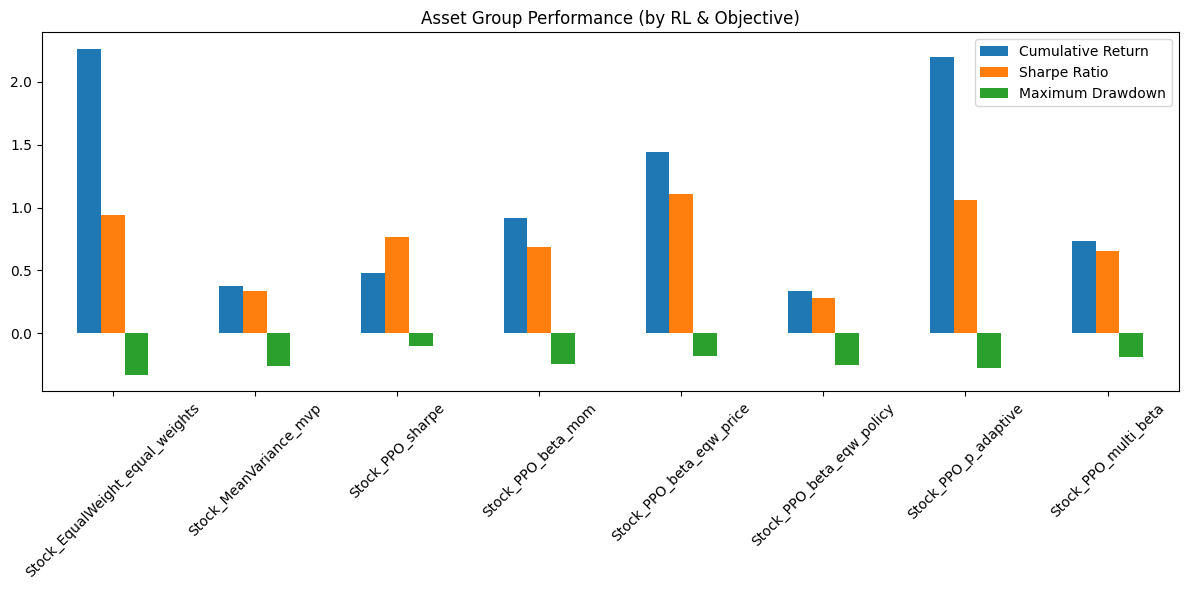

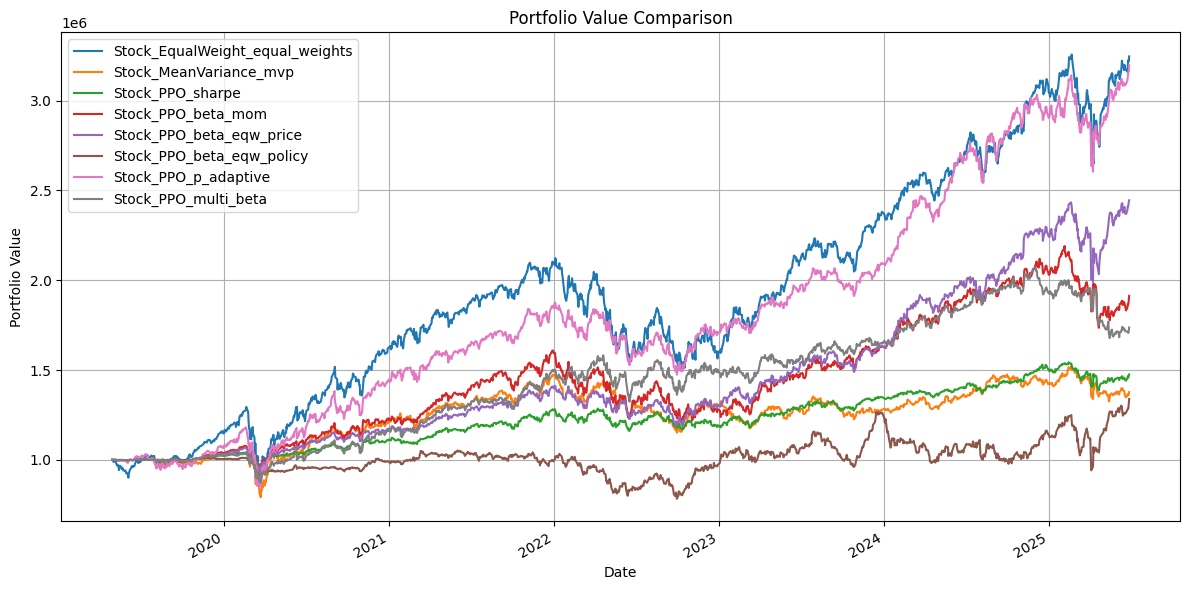


üîé [Stock_PPO_sharpe vs Stock_PPO_beta_mom]
‚ñ∂ t-test p-value: 0.4833 ‚Üí Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå
‚ñ∂ Mann‚ÄìWhitney U-test p-value: 0.0455 ‚Üí Ïú†ÏùòÎØ∏Ìï®

üîé [Stock_PPO_sharpe vs Stock_PPO_beta_eqw_price]
‚ñ∂ t-test p-value: 0.1838 ‚Üí Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå
‚ñ∂ Mann‚ÄìWhitney U-test p-value: 0.0802 ‚Üí Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå

üîé [Stock_PPO_sharpe vs Stock_PPO_beta_eqw_policy]
‚ñ∂ t-test p-value: 0.9536 ‚Üí Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå
‚ñ∂ Mann‚ÄìWhitney U-test p-value: 0.6752 ‚Üí Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå

üîé [Stock_PPO_sharpe vs Stock_PPO_p_adaptive]
‚ñ∂ t-test p-value: 0.1007 ‚Üí Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå
‚ñ∂ Mann‚ÄìWhitney U-test p-value: 0.0003 ‚Üí Ïú†ÏùòÎØ∏Ìï®

üîé [Stock_PPO_sharpe vs Stock_PPO_multi_beta]
‚ñ∂ t-test p-value: 0.6218 ‚Üí Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå
‚ñ∂ Mann‚ÄìWhitney U-test p-value: 0.3197 ‚Üí Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå
   Group Algorithm      CompareWith       t_p       u_p
0  Stock       PPO         beta_mom  0.483317  0.045470
1  Stock       PPO   beta_eqw_price  0.18

In [29]:
 # Ïã§Ìóò Ïã§Ìñâ
results = {}
previous_group = None

for group, assets, algo_name, algo_class, objective in stock_experiments:
    key = f"{group}_{algo_name}_{objective}"
    print(f"‚ñ∂ Running: {key}")
    try:
        results[key] = train_and_evaluate(assets, algo_class, objective)
    except Exception as e:
        print(f"Error in {key}: {str(e)}")
        results[key] = None
    # Í∑∏Î£πÏù¥ Î∞îÎÄîÎïåÎßå Í∏∞Ïà†ÌÜµÍ≥Ñ Ï∂úÎ†•
    if previous_group != group:
        show_summary = True
        previous_group = group
    else:
        show_summary = False


# ÏÑ±Í≥º ÏöîÏïΩ (Ïò§Î•ò Ï†úÏô∏)
valid_results = {k: v for k, v in results.items() if v is not None}
metrics_table = pd.DataFrame({k: performance_metrics(v) for k, v in valid_results.items()}).T
print(metrics_table)

# ÏÑ±Í≥º ÎßâÎåÄÍ∑∏ÎûòÌîÑ
metrics_table[["Cumulative Return", "Sharpe Ratio", "Maximum Drawdown"]].plot(
    kind="bar", figsize=(12, 6), title="Asset Group Performance (by RL & Objective)"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏπò ÏãúÍ≥ÑÏó¥ Í∑∏ÎûòÌîÑ
results_df = pd.DataFrame(valid_results)
results_df.plot(figsize=(12, 6), title="Portfolio Value Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.tight_layout()
plt.show()



# sharpe Î•º baselineÏúºÎ°ú ÌïòÏó¨ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú ÏùòÎØ∏Í∞Ä ÏûàÎäîÏßÄ ÎπÑÍµêÌï®
summary = []

for (group, assets, algo, model_cls, obj) in stock_experiments:
    if obj == "sharpe":
        continue  # baseline Ï†úÏô∏

    base_key = f"{group}_{algo}_sharpe"
    compare_key = f"{group}_{algo}_{obj}"

    # Add check for None before calling compare_strategies
    if base_key in results and compare_key in results and results[base_key] is not None and results[compare_key] is not None:
        res = compare_strategies(results[base_key], results[compare_key], label1=base_key, label2=compare_key)
        summary.append({
            "Group": group,
            "Algorithm": algo,
            "CompareWith": obj,
            "t_p": res["t_p"],
            "u_p": res["u_p"]
        })

summary_df = pd.DataFrame(summary)
#import ace_tools as tools; tools.display_dataframe_to_user(name="Comparison Results", dataframe=summary_df)
print(summary_df)

ÏïîÌò∏ÏûêÏÇ∞ ÌèâÍ∞Ä

In [30]:
 # Ïã§Ìóò Ïã§Ìñâ
results = {}
previous_group = None

for group, assets, algo_name, algo_class, objective in Crypto_experiments:
    key = f"{group}_{algo_name}_{objective}"
    print(f"‚ñ∂ Running: {key}")
    try:
        results[key] = train_and_evaluate(assets, algo_class, objective)
    except Exception as e:
        print(f"Error in {key}: {str(e)}")
        results[key] = None
    # Í∑∏Î£πÏù¥ Î∞îÎÄîÎïåÎßå Í∏∞Ïà†ÌÜµÍ≥Ñ Ï∂úÎ†•
    if previous_group != group:
        show_summary = True
        previous_group = group
    else:
        show_summary = False


# ÏÑ±Í≥º ÏöîÏïΩ (Ïò§Î•ò Ï†úÏô∏)
valid_results = {k: v for k, v in results.items() if v is not None}
metrics_table = pd.DataFrame({k: performance_metrics(v) for k, v in valid_results.items()}).T
print(metrics_table)

# ÏÑ±Í≥º ÎßâÎåÄÍ∑∏ÎûòÌîÑ
metrics_table[["Cumulative Return", "Sharpe Ratio", "Maximum Drawdown"]].plot(
    kind="bar", figsize=(12, 6), title="Asset Group Performance (by RL & Objective)"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏπò ÏãúÍ≥ÑÏó¥ Í∑∏ÎûòÌîÑ
results_df = pd.DataFrame(valid_results)
results_df.plot(figsize=(12, 6), title="Portfolio Value Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.tight_layout()
plt.show()



# sharpe Î•º baselineÏúºÎ°ú ÌïòÏó¨ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú ÏùòÎØ∏Í∞Ä ÏûàÎäîÏßÄ ÎπÑÍµêÌï®
summary = []

for (group, assets, algo, model_cls, obj) in Crypto_experiments:
    if obj == "sharpe":
        continue  # baseline Ï†úÏô∏

    base_key = f"{group}_{algo}_sharpe"
    compare_key = f"{group}_{algo}_{obj}"

    # Add check for None before calling compare_strategies
    if base_key in results and compare_key in results and results[base_key] is not None and results[compare_key] is not None:
        res = compare_strategies(results[base_key], results[compare_key], label1=base_key, label2=compare_key)
        summary.append({
            "Group": group,
            "Algorithm": algo,
            "CompareWith": obj,
            "t_p": res["t_p"],
            "u_p": res["u_p"]
        })

summary_df = pd.DataFrame(summary)
#import ace_tools as tools; tools.display_dataframe_to_user(name="Comparison Results", dataframe=summary_df)
print(summary_df)

‚ñ∂ Running: Crypto_EqualWeight_equal_weights
‚ñ∂ Running: Crypto_MeanVariance_mvp

[Í∏∞Ïà†ÌÜµÍ≥Ñ ÏöîÏïΩ: Price]
          count        mean         std        min         25%         50%  \
Ticker                                                                       
BNB-USD  1846.0    364.1718    195.5147    15.1853    244.0997    322.7530   
BTC-USD  1846.0  44575.8803  25693.6774  9045.3906  24191.0161  39403.7637   
ETH-USD  1846.0   2182.4931   1015.8011   222.9598   1579.7525   2052.6350   
SOL-USD  1846.0     80.1243     71.0398     0.5706     20.5924     42.7757   

                75%          max  
Ticker                            
BNB-USD    556.2794     750.2726  
BTC-USD  60791.5312  111673.2812  
ETH-USD   2961.4708    4812.0874  
SOL-USD    143.8059     261.8698  

[Í∏∞Ïà†ÌÜµÍ≥Ñ ÏöîÏïΩ: Returns]
          count    mean     std     min     25%     50%     75%     max
Ticker                                                                 
BNB-USD  1846.0  0.0029  0.0448 

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Crypto_PPO_beta_mom


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Crypto_PPO_beta_eqw_price


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Crypto_PPO_beta_eqw_policy


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Crypto_PPO_p_adaptive


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Crypto_PPO_multi_beta


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


                                  Sharpe Ratio  Sortino Ratio  \
Crypto_EqualWeight_equal_weights      1.254438       1.739263   
Crypto_MeanVariance_mvp               0.983912       1.373160   
Crypto_PPO_sharpe                     0.434778       0.549912   
Crypto_PPO_beta_mom                   0.261134       0.329547   
Crypto_PPO_beta_eqw_price             0.261134       0.329547   
Crypto_PPO_beta_eqw_policy            0.277944       0.370880   
Crypto_PPO_p_adaptive                 0.677812       0.915729   
Crypto_PPO_multi_beta                 0.261134       0.329547   

                                  Cumulative Return  Annualized Return  \
Crypto_EqualWeight_equal_weights          63.183013           0.766042   
Crypto_MeanVariance_mvp                   16.289117           0.495355   
Crypto_PPO_sharpe                          1.032180           0.101642   
Crypto_PPO_beta_mom                        0.816221           0.084874   
Crypto_PPO_beta_eqw_price                  0


üîé [Crypto_PPO_sharpe vs Crypto_PPO_beta_mom]
‚ñ∂ t-test p-value: 0.9440 ‚Üí Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå
‚ñ∂ Mann‚ÄìWhitney U-test p-value: 0.7186 ‚Üí Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå

üîé [Crypto_PPO_sharpe vs Crypto_PPO_beta_eqw_price]
‚ñ∂ t-test p-value: 0.9440 ‚Üí Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå
‚ñ∂ Mann‚ÄìWhitney U-test p-value: 0.7186 ‚Üí Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå

üîé [Crypto_PPO_sharpe vs Crypto_PPO_beta_eqw_policy]
‚ñ∂ t-test p-value: 0.6430 ‚Üí Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå
‚ñ∂ Mann‚ÄìWhitney U-test p-value: 0.3396 ‚Üí Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå

üîé [Crypto_PPO_sharpe vs Crypto_PPO_p_adaptive]
‚ñ∂ t-test p-value: 0.0969 ‚Üí Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå
‚ñ∂ Mann‚ÄìWhitney U-test p-value: 0.0122 ‚Üí Ïú†ÏùòÎØ∏Ìï®

üîé [Crypto_PPO_sharpe vs Crypto_PPO_multi_beta]
‚ñ∂ t-test p-value: 0.9440 ‚Üí Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå
‚ñ∂ Mann‚ÄìWhitney U-test p-value: 0.7186 ‚Üí Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå
    Group Algorithm      CompareWith       t_p       u_p
0  Crypto       PPO         beta_mom  0.943961  0.718565
1  Crypto       PPO

ÌòºÌï©ÏûêÏÇ∞

In [31]:
 # Ïã§Ìóò Ïã§Ìñâ
results = {}
previous_group = None

for group, assets, algo_name, algo_class, objective in Mixed_experiments:
    key = f"{group}_{algo_name}_{objective}"
    print(f"‚ñ∂ Running: {key}")
    try:
        results[key] = train_and_evaluate(assets, algo_class, objective)
    except Exception as e:
        print(f"Error in {key}: {str(e)}")
        results[key] = None
    # Í∑∏Î£πÏù¥ Î∞îÎÄîÎïåÎßå Í∏∞Ïà†ÌÜµÍ≥Ñ Ï∂úÎ†•
    if previous_group != group:
        show_summary = True
        previous_group = group
    else:
        show_summary = False


# ÏÑ±Í≥º ÏöîÏïΩ (Ïò§Î•ò Ï†úÏô∏)
valid_results = {k: v for k, v in results.items() if v is not None}
metrics_table = pd.DataFrame({k: performance_metrics(v) for k, v in valid_results.items()}).T
print(metrics_table)

# ÏÑ±Í≥º ÎßâÎåÄÍ∑∏ÎûòÌîÑ
metrics_table[["Cumulative Return", "Sharpe Ratio", "Maximum Drawdown"]].plot(
    kind="bar", figsize=(12, 6), title="Asset Group Performance (by RL & Objective)"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏπò ÏãúÍ≥ÑÏó¥ Í∑∏ÎûòÌîÑ
results_df = pd.DataFrame(valid_results)
results_df.plot(figsize=(12, 6), title="Portfolio Value Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.tight_layout()
plt.show()



# sharpe Î•º baselineÏúºÎ°ú ÌïòÏó¨ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú ÏùòÎØ∏Í∞Ä ÏûàÎäîÏßÄ ÎπÑÍµêÌï®
summary = []

for (group, assets, algo, model_cls, obj) in Mixed_experiments:
    if obj == "sharpe":
        continue  # baseline Ï†úÏô∏

    base_key = f"{group}_{algo}_sharpe"
    compare_key = f"{group}_{algo}_{obj}"

    # Add check for None before calling compare_strategies
    if base_key in results and compare_key in results and results[base_key] is not None and results[compare_key] is not None:
        res = compare_strategies(results[base_key], results[compare_key], label1=base_key, label2=compare_key)
        summary.append({
            "Group": group,
            "Algorithm": algo,
            "CompareWith": obj,
            "t_p": res["t_p"],
            "u_p": res["u_p"]
        })

summary_df = pd.DataFrame(summary)
#import ace_tools as tools; tools.display_dataframe_to_user(name="Comparison Results", dataframe=summary_df)
print(summary_df)

‚ñ∂ Running: Mixed_EqualWeight_equal_weights
‚ñ∂ Running: Mixed_MeanVariance_mvp

[Í∏∞Ïà†ÌÜµÍ≥Ñ ÏöîÏïΩ: Price]
         count      mean       std       min       25%       50%       75%  \
Ticker                                                                       
AAPL    1551.0  146.1020   53.1364   41.6182  116.8501  148.5955  181.8055   
AMZN    1551.0  145.2851   38.4958   81.8200  108.5955  152.4205  172.4770   
BA      1551.0  211.6486   61.9536   95.0100  171.8250  201.4000  225.8600   
DIS     1551.0  120.8253   29.7898   78.0194   96.1545  112.4946  138.9603   
GOOGL   1551.0  116.1257   38.2523   51.6274   85.5688  117.2717  142.6634   
INTC    1551.0   39.1604   11.1412   18.1300   29.6374   41.6159   48.2829   
JNJ     1551.0  143.4508   15.2327   95.7680  131.0772  147.8406  154.1154   
JPM     1551.0  142.2943   48.9280   67.7354  106.7784  133.1664  154.6053   
KO      1551.0   53.2282    8.6614   31.9843   45.7942   54.5751   58.5416   
META    1551.0  313.3819  150.3

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Mixed_PPO_beta_mom


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Mixed_PPO_beta_eqw_price


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Mixed_PPO_beta_eqw_policy


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Mixed_PPO_p_adaptive


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Mixed_PPO_multi_beta


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


                                 Sharpe Ratio  Sortino Ratio  \
Mixed_EqualWeight_equal_weights      0.944441       1.157708   
Mixed_MeanVariance_mvp               0.338438       0.420876   
Mixed_PPO_sharpe                     0.764336       0.977753   
Mixed_PPO_beta_mom                   0.686795       0.890540   
Mixed_PPO_beta_eqw_price             1.106466       1.433624   
Mixed_PPO_beta_eqw_policy            0.281278       0.346601   
Mixed_PPO_p_adaptive                 1.061569       1.283530   
Mixed_PPO_multi_beta                 0.654285       0.830450   

                                 Cumulative Return  Annualized Return  \
Mixed_EqualWeight_equal_weights           2.265497           0.212306   
Mixed_MeanVariance_mvp                    0.378640           0.055808   
Mixed_PPO_sharpe                          0.475375           0.065228   
Mixed_PPO_beta_mom                        0.913156           0.111163   
Mixed_PPO_beta_eqw_price                  1.445232        


üîé [Mixed_PPO_sharpe vs Mixed_PPO_beta_mom]
‚ñ∂ t-test p-value: 0.4833 ‚Üí Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå
‚ñ∂ Mann‚ÄìWhitney U-test p-value: 0.0455 ‚Üí Ïú†ÏùòÎØ∏Ìï®

üîé [Mixed_PPO_sharpe vs Mixed_PPO_beta_eqw_price]
‚ñ∂ t-test p-value: 0.1838 ‚Üí Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå
‚ñ∂ Mann‚ÄìWhitney U-test p-value: 0.0802 ‚Üí Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå

üîé [Mixed_PPO_sharpe vs Mixed_PPO_beta_eqw_policy]
‚ñ∂ t-test p-value: 0.9536 ‚Üí Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå
‚ñ∂ Mann‚ÄìWhitney U-test p-value: 0.6752 ‚Üí Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå

üîé [Mixed_PPO_sharpe vs Mixed_PPO_p_adaptive]
‚ñ∂ t-test p-value: 0.1007 ‚Üí Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå
‚ñ∂ Mann‚ÄìWhitney U-test p-value: 0.0003 ‚Üí Ïú†ÏùòÎØ∏Ìï®

üîé [Mixed_PPO_sharpe vs Mixed_PPO_multi_beta]
‚ñ∂ t-test p-value: 0.6218 ‚Üí Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå
‚ñ∂ Mann‚ÄìWhitney U-test p-value: 0.3197 ‚Üí Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå
   Group Algorithm      CompareWith       t_p       u_p
0  Mixed       PPO         beta_mom  0.483317  0.045470
1  Mixed       PPO   beta_eqw_price  0.18

ÌòºÏû°ÏûêÏÇ∞ Î™®Îëê

In [ ]:
 # Ïã§Ìóò Ïã§Ìñâ
results = {}
previous_group = None

for group, assets, algo_name, algo_class, objective in Mixed_all_experiments:
    key = f"{group}_{algo_name}_{objective}"
    print(f"‚ñ∂ Running: {key}")
    try:
        results[key] = train_and_evaluate(assets, algo_class, objective)
    except Exception as e:
        print(f"Error in {key}: {str(e)}")
        results[key] = None
    # Í∑∏Î£πÏù¥ Î∞îÎÄîÎïåÎßå Í∏∞Ïà†ÌÜµÍ≥Ñ Ï∂úÎ†•
    if previous_group != group:
        show_summary = True
        previous_group = group
    else:
        show_summary = False


# ÏÑ±Í≥º ÏöîÏïΩ (Ïò§Î•ò Ï†úÏô∏)
valid_results = {k: v for k, v in results.items() if v is not None}
metrics_table = pd.DataFrame({k: performance_metrics(v) for k, v in valid_results.items()}).T
print(metrics_table)

# ÏÑ±Í≥º ÎßâÎåÄÍ∑∏ÎûòÌîÑ
metrics_table[["Cumulative Return", "Sharpe Ratio", "Maximum Drawdown"]].plot(
    kind="bar", figsize=(12, 6), title="Asset Group Performance (by RL & Objective)"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏπò ÏãúÍ≥ÑÏó¥ Í∑∏ÎûòÌîÑ
results_df = pd.DataFrame(valid_results)
results_df.plot(figsize=(12, 6), title="Portfolio Value Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.tight_layout()
plt.show()



# sharpe Î•º baselineÏúºÎ°ú ÌïòÏó¨ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú ÏùòÎØ∏Í∞Ä ÏûàÎäîÏßÄ ÎπÑÍµêÌï®
summary = []

for (group, assets, algo, model_cls, obj) in Mixed_all_experiments:
    if obj == "sharpe":
        continue  # baseline Ï†úÏô∏

    base_key = f"{group}_{algo}_sharpe"
    compare_key = f"{group}_{algo}_{obj}"

    # Add check for None before calling compare_strategies
    if base_key in results and compare_key in results and results[base_key] is not None and results[compare_key] is not None:
        res = compare_strategies(results[base_key], results[compare_key], label1=base_key, label2=compare_key)
        summary.append({
            "Group": group,
            "Algorithm": algo,
            "CompareWith": obj,
            "t_p": res["t_p"],
            "u_p": res["u_p"]
        })

summary_df = pd.DataFrame(summary)
#import ace_tools as tools; tools.display_dataframe_to_user(name="Comparison Results", dataframe=summary_df)
print(summary_df)

‚ñ∂ Running: Mixed_EqualWeight_equal_weights
‚ñ∂ Running: Mixed_MeanVariance_mvp

[Í∏∞Ïà†ÌÜµÍ≥Ñ ÏöîÏïΩ: Price]
         count      mean       std       min       25%       50%       75%  \
Ticker                                                                       
AAPL    1551.0  146.1020   53.1364   41.6182  116.8501  148.5955  181.8055   
AMZN    1551.0  145.2851   38.4958   81.8200  108.5955  152.4205  172.4770   
BA      1551.0  211.6486   61.9536   95.0100  171.8250  201.4000  225.8600   
DIS     1551.0  120.8253   29.7898   78.0194   96.1545  112.4946  138.9603   
GOOGL   1551.0  116.1257   38.2523   51.6274   85.5688  117.2717  142.6634   
INTC    1551.0   39.1604   11.1412   18.1300   29.6374   41.6159   48.2829   
JNJ     1551.0  143.4508   15.2327   95.7680  131.0772  147.8406  154.1154   
JPM     1551.0  142.2943   48.9280   67.7354  106.7784  133.1664  154.6053   
KO      1551.0   53.2282    8.6614   31.9843   45.7942   54.5751   58.5416   
META    1551.0  313.3819  150.3

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Mixed_PPO_beta_mom


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Mixed_PPO_beta_eqw_price


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Mixed_PPO_beta_eqw_policy


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Mixed_PPO_p_adaptive


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Mixed_PPO_multi_beta


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Mixed_SAC_sharpe


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Mixed_SAC_beta_mom


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Mixed_SAC_beta_eqw_price


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Mixed_SAC_beta_eqw_policy


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Mixed_SAC_p_adaptive


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Mixed_SAC_multi_beta


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Mixed_TD3_sharpe


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Mixed_TD3_beta_mom


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Mixed_TD3_beta_eqw_price


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


‚ñ∂ Running: Mixed_TD3_beta_eqw_policy


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [ ]:
Î©àÏ∂∞

In [ ]:
# Í∞ïÌôîÌïôÏäµ ÌôòÍ≤Ω (Î≥¥ÏÉÅ Í≥ÑÏÇ∞ Î°úÏßÅ ÏàòÏ†ï: Î≤†ÌÉÄ Ìå©ÌÑ∞ ÌôúÏö©)
class PPOPortfolioEnv(gym.Env):
    def __init__(self, returns, factors, price, objective="sharpe"):
        super().__init__()
        self.returns = returns
        self.factors = factors
        self.price = price
        self.assets = returns.columns.tolist()
        self.n_assets = len(self.assets)
        self.window = 20
        self.current_step = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        self.objective = objective
        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)

        # ÏÉÅÌÉú Í≥µÍ∞Ñ ÌÅ¨Í∏∞ ÏûêÎèô Ï°∞Ï†ï (Î≤†ÌÉÄ Ìå©ÌÑ∞ Ï∂îÍ∞ÄÎ°ú Ïù∏Ìï¥)
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf,
            shape=(self.window, factors.shape[1]),
            dtype=np.float32
        )

    def reset(self):
        self.current_step = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        return self.factors.iloc[self.current_step - self.window:self.current_step].values

    def step(self, action):
        action = np.clip(action, 0, 1)
        action = action / (np.sum(action) + 1e-8)  # Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπò Ï†ïÍ∑úÌôî

        # ÌòÑÏû¨ Í∞ÄÍ≤© Î∞è Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏπò
        price_today = self.price.iloc[self.current_step].values
        total_value = self.cash + np.sum(self.asset_quantity * price_today)

        # Î™©Ìëú ÏûêÏÇ∞ Í∞ÄÏπò Í≥ÑÏÇ∞
        desired_value = action * total_value
        current_value = self.asset_quantity * price_today
        trade_value = desired_value - current_value

        # Í±∞Îûò ÎπÑÏö© (0.1% ÏàòÏàòÎ£å)
        cost = np.sum(np.abs(trade_value)) * 0.001
        net_trade_value = trade_value - np.sign(trade_value) * cost / self.n_assets

        # ÏûêÏÇ∞ Î∞è ÌòÑÍ∏à ÏóÖÎç∞Ïù¥Ìä∏
        self.asset_quantity += net_trade_value / price_today
        self.cash = total_value - np.sum(self.asset_quantity * price_today) - cost

        # Îã§Ïùå Ïä§ÌÖùÏùò Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏπò Í≥ÑÏÇ∞
        price_next = self.price.iloc[self.current_step + 1].values
        port_value_next = self.cash + np.sum(self.asset_quantity * price_next)
        port_return = (port_value_next - total_value) / total_value

        self.portfolio_returns.append(port_return)
        self.portfolio_value.append(port_value_next)
        self.current_step += 1

        # Ï¢ÖÎ£å Ï°∞Í±¥ ÌôïÏù∏
        done = self.current_step >= len(self.returns) - 2

        # Í¥ÄÏ∏°Í∞í ÏóÖÎç∞Ïù¥Ìä∏
        obs = self.factors.iloc[self.current_step - self.window:self.current_step].values

        # Î≥¥ÏÉÅ Í≥ÑÏÇ∞ (Î≤†ÌÉÄ Ìå©ÌÑ∞ ÌôúÏö© Î∞©Ïãù ÏàòÏ†ï)
        if self.objective == "oldsharpe":
            if len(self.portfolio_returns) > 1:
                returns_window = np.array(self.portfolio_returns[-20:])
                reward = np.mean(returns_window) / (np.std(returns_window) + 1e-6)
            else:
                reward = 0
        elif self.objective == "sharpe":
            if len(self.portfolio_returns) > 1:
                returns_array = np.array(self.portfolio_returns)
                mean_ret = np.mean(returns_array)
                std_ret = np.std(returns_array)

                # Ï†ÑÏ≤¥ Íµ¨Í∞Ñ Sharpe ÎπÑÏú® ÏÇ¨Ïö©
                reward = mean_ret / (std_ret + 1e-6)
            else:
                reward = 0

        elif self.objective == "beta_mom":
            # Î≤†ÌÉÄ Ìå©ÌÑ∞ ÏÑ†ÌÉù (4Í∞ú Ìå©ÌÑ∞ Ï§ë Î™®Î©òÌÖÄ Î≤†ÌÉÄ ÏÇ¨Ïö©)
            beta_scores = []
            for asset in self.assets:
                # Í∞Å ÏûêÏÇ∞Î≥Ñ beta_mom Í∞í ÏÑ†ÌÉù (Ïñ∏ÎçîÏä§ÏΩîÏñ¥ ÌòïÏãùÏúºÎ°ú Î≥ÄÍ≤Ω)
                beta_mom = self.factors.iloc[self.current_step - 1].get(f"{asset}_beta_mom", 0)
                beta_scores.append(beta_mom)
            reward = np.dot(action, np.array(beta_scores))

        elif self.objective == "beta_vol":
            # Î≤†ÌÉÄ Ìå©ÌÑ∞ ÏÑ†ÌÉù (4Í∞ú Ìå©ÌÑ∞ Ï§ë Î™®Î©òÌÖÄ Î≤†ÌÉÄ ÏÇ¨Ïö©)
            beta_scores = []
            for asset in self.assets:
                # Í∞Å ÏûêÏÇ∞Î≥Ñ beta_mom Í∞í ÏÑ†ÌÉù (Ïñ∏ÎçîÏä§ÏΩîÏñ¥ ÌòïÏãùÏúºÎ°ú Î≥ÄÍ≤Ω)
                beta_mom = self.factors.iloc[self.current_step - 1].get(f"{asset}_beta_vol", 0)
                beta_scores.append(beta_mom)
            reward = -np.dot(action, np.array(beta_scores))

        elif self.objective == "beta_ma":
            # Î≤†ÌÉÄ Ìå©ÌÑ∞ ÏÑ†ÌÉù (4Í∞ú Ìå©ÌÑ∞ Ï§ë Î™®Î©òÌÖÄ Î≤†ÌÉÄ ÏÇ¨Ïö©)
            beta_scores = []
            for asset in self.assets:
                # Í∞Å ÏûêÏÇ∞Î≥Ñ beta_mom Í∞í ÏÑ†ÌÉù (Ïñ∏ÎçîÏä§ÏΩîÏñ¥ ÌòïÏãùÏúºÎ°ú Î≥ÄÍ≤Ω)
                beta_mom = self.factors.iloc[self.current_step - 1].get(f"{asset}_beta_ma", 0)
                beta_scores.append(beta_mom)
            reward = -np.dot(action, np.array(beta_scores))

        elif self.objective == "beta_sharpe":
            # Î≤†ÌÉÄ Ìå©ÌÑ∞ ÏÑ†ÌÉù (4Í∞ú Ìå©ÌÑ∞ Ï§ë Î™®Î©òÌÖÄ Î≤†ÌÉÄ ÏÇ¨Ïö©)
            beta_scores = []
            for asset in self.assets:
                # Í∞Å ÏûêÏÇ∞Î≥Ñ beta_mom Í∞í ÏÑ†ÌÉù (Ïñ∏ÎçîÏä§ÏΩîÏñ¥ ÌòïÏãùÏúºÎ°ú Î≥ÄÍ≤Ω)
                beta_mom = self.factors.iloc[self.current_step - 1].get(f"{asset}_beta_sharpe", 0)
                beta_scores.append(beta_mom)
            reward = np.dot(action, np.array(beta_scores))

        elif self.objective == "beta_mdd":
            # Î≤†ÌÉÄ Ìå©ÌÑ∞ ÏÑ†ÌÉù (4Í∞ú Ìå©ÌÑ∞ Ï§ë Î™®Î©òÌÖÄ Î≤†ÌÉÄ ÏÇ¨Ïö©)
            beta_scores = []
            for asset in self.assets:
                # Í∞Å ÏûêÏÇ∞Î≥Ñ beta_mom Í∞í ÏÑ†ÌÉù (Ïñ∏ÎçîÏä§ÏΩîÏñ¥ ÌòïÏãùÏúºÎ°ú Î≥ÄÍ≤Ω)
                beta_mom = self.factors.iloc[self.current_step - 1].get(f"{asset}_beta_mdd", 0)
                beta_scores.append(beta_mom)
            reward = np.dot(action, np.array(beta_scores))

        elif self.objective == "beta_eqw_price":
            # Î≤†ÌÉÄ Ìå©ÌÑ∞ ÏÑ†ÌÉù
            beta_scores = []
            for asset in self.assets:
                # Í∞Å ÏûêÏÇ∞Î≥Ñ beta_eqw_price Í∞í ÏÑ†ÌÉù (Ïñ∏ÎçîÏä§ÏΩîÏñ¥ ÌòïÏãùÏúºÎ°ú Î≥ÄÍ≤Ω)
                beta_eqw_price = self.factors.iloc[self.current_step - 1].get(f"{asset}_beta_eqw_price", 0)
                beta_scores.append(beta_eqw_price)
            reward = np.dot(action, np.array(beta_scores))

        elif self.objective == "beta_eqw_policy":
            # Î≤†ÌÉÄ Ìå©ÌÑ∞ ÏÑ†ÌÉù
            beta_scores = []
            for asset in self.assets:
                # Í∞Å ÏûêÏÇ∞Î≥Ñ beta_eqw_policy Í∞í ÏÑ†ÌÉù (Ïñ∏ÎçîÏä§ÏΩîÏñ¥ ÌòïÏãùÏúºÎ°ú Î≥ÄÍ≤Ω)
                beta_eqw_policy = self.factors.iloc[self.current_step - 1].get(f"{asset}_beta_eqw_policy", 0)
                beta_scores.append(beta_eqw_policy)
            reward = np.dot(action, np.array(beta_scores))

        elif self.objective == "eqw_hybrid":
            eqw_price_scores = []
            eqw_policy_scores = []

            for asset in self.assets:
                eqw_price = self.factors.iloc[self.current_step - 1].get(f"{asset}_beta_eqw_price", 0)
                eqw_policy = self.factors.iloc[self.current_step - 1].get(f"{asset}_beta_eqw_policy", 0)
                eqw_price_scores.append(eqw_price)
                eqw_policy_scores.append(eqw_policy)

            reward_price = np.dot(action, np.array(eqw_price_scores))
            reward_policy = np.dot(action, np.array(eqw_policy_scores))
            reward = 0.5 * reward_price + 0.5 * reward_policy

        elif self.objective == "momvol":
            beta_scores = []
            for asset in self.assets:
                # Î™®Î©òÌÖÄ: ÎÜíÏùÑÏàòÎ°ù Ï¢ãÏùå (Ïñ∏ÎçîÏä§ÏΩîÏñ¥ ÌòïÏãùÏúºÎ°ú Î≥ÄÍ≤Ω)
                mom = self.factors.iloc[self.current_step - 1].get(f"{asset}_beta_mom", 0)
                # Î≥ÄÎèôÏÑ±: ÎÇÆÏùÑÏàòÎ°ù Ï¢ãÏùå ‚Üí ÏùåÏàò Î∂ÄÌò∏ (Ïñ∏ÎçîÏä§ÏΩîÏñ¥ ÌòïÏãùÏúºÎ°ú Î≥ÄÍ≤Ω)
                vol = self.factors.iloc[self.current_step - 1].get(f"{asset}_beta_vol", 0)

                # Ï°∞Ìï©: Î™®Î©òÌÖÄ - Œ± * Î≥ÄÎèôÏÑ± (ex. Œ±=1, ÌòπÏùÄ ÌäúÎãù) beta_volÏù¥ ÏùåÏàòÎ°ú ÎêòÏñ¥ ÏûàÏùå
                score = mom + vol
                beta_scores.append(score)

            reward = np.dot(action, np.array(beta_scores))

        elif self.objective == "multi_beta1":
            # Ìå©ÌÑ∞ Ïù¥Î¶ÑÏóêÏÑú 'beta_' Ï†ëÎëêÏÇ¨Îäî Ï†úÍ±∞Îêú ÏÉÅÌÉú
            beta_factors = ["mom", "vol", "ma", "volz", "sharpe", "mdd", "eqw_price", "eqw_policy"]
            beta_scores = []

            for asset in self.assets:
                beta_total = 0
                for factor_name in beta_factors:
                    col_name = f"{asset}_beta_{factor_name}"
                    beta_val = self.factors.iloc[self.current_step - 1].get(col_name, 0)
                    beta_total += beta_val
                # ÌèâÍ∑† Ï†êÏàò Í≥ÑÏÇ∞
                beta_scores.append(beta_total / len(beta_factors))

            reward = np.dot(action, np.array(beta_scores))

        elif self.objective == "multi_beta2":
            beta_factors = ["mom", "vol", "ma", "volz", "sharpe", "mdd", "eqw_price", "eqw_policy"]
            beta_scores = []

            for asset in self.assets:
                beta_total = 0
                found_factors = 0
                for factor_name in beta_factors:
                    col_name = f"{asset}_beta_{factor_name}"
                    if col_name in self.factors.columns:
                        beta_val = self.factors.iloc[self.current_step - 1][col_name]
                        beta_total += beta_val
                        found_factors += 1
                    else:
                        print(f"[Í≤ΩÍ≥†] ÎàÑÎùΩÎêú Ìå©ÌÑ∞: {col_name}")
                if found_factors > 0:
                    beta_scores.append(beta_total / found_factors)
                else:
                    beta_scores.append(0.0)  # Î™®Îì† Ìå©ÌÑ∞Í∞Ä ÎàÑÎùΩÎêòÏóàÏùÑ Í≤ΩÏö∞ ÏòàÏô∏Ï≤òÎ¶¨

            reward = -np.dot(action, np.array(beta_scores))

        elif self.objective == "multi_beta":
            beta_scores = []
            beta_factors = {
                "mom": +1,
                "vol": -1,
                "ma": +1,
                "volz": -1,
                "sharpe": +1,
                "mdd": +1,               # drawdown Ï†ÅÏùÑÏàòÎ°ù Ï¢ãÏúºÎÇò betaÎäî 1-|MDD| ÌòïÌÉúÎ°ú ÎêòÏñ¥ ÏûàÏúºÎØÄÎ°ú +1 Ïú†ÏßÄ
                "eqw_price": -1,         # price ÎπÑÏ§ëÏù¥ EWÏóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Ï¢ãÎã§Î©¥ ‚Üí -1 (Ìé∏Ï∞® ÏûëÏùÑÏàòÎ°ù)
                "eqw_policy": -1         # actionÏù¥ EWÏóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Ï¢ãÎã§Î©¥ ‚Üí -1
            }
            for asset in self.assets:
                beta_total = 0
                found_factors = 0
                for factor_name, direction in beta_factors.items():
                    col_name = f"{asset}_beta_{factor_name}"
                    if col_name in self.factors.columns:
                        beta_val = self.factors.iloc[self.current_step - 1][col_name]
                        beta_total += direction * beta_val
                        found_factors += 1
                    else:
                        print(f"[Í≤ΩÍ≥†] ÎàÑÎùΩÎêú Ìå©ÌÑ∞: {col_name}")
                if found_factors > 0:
                    beta_scores.append(beta_total / found_factors)
                else:
                    beta_scores.append(0.0)

            reward = np.dot(action, np.array(beta_scores))  # ‚ùå ÏùåÏàò Î∂ÄÌò∏ Ï†úÍ±∞

        elif self.objective == "hybrid":
            if len(self.portfolio_returns) > 1:
                returns_window = np.array(self.portfolio_returns[-20:])
                sharpe = np.mean(returns_window) / (np.std(returns_window) + 1e-6)
            else:
                sharpe = 0

            # Î≤†ÌÉÄ Ìå©ÌÑ∞ ÏÑ†ÌÉù (4Í∞ú Ìå©ÌÑ∞ Ï§ë Î™®Î©òÌÖÄ Î≤†ÌÉÄ ÏÇ¨Ïö©)
            beta_scores = []
            for asset in self.assets:
                # Ïñ∏ÎçîÏä§ÏΩîÏñ¥ ÌòïÏãùÏúºÎ°ú Î≥ÄÍ≤Ω
                beta_mom = self.factors.iloc[self.current_step - 1].get(f"{asset}_beta_mom", 0)
                beta_scores.append(beta_mom)
            beta = np.dot(action, np.array(beta_scores))
            reward = 0.5 * sharpe + 0.5 * beta

        elif self.objective == "multi_hybrid":
            # ÏµúÍ∑º ÏàòÏùµÎ•† Í∏∞Î∞ò ÏÉ§ÌîÑ Í≥ÑÏÇ∞
            if len(self.portfolio_returns) > 1:
                returns_window = np.array(self.portfolio_returns[-20:])
                sharpe = np.mean(returns_window) / (np.std(returns_window) + 1e-6)
            else:
                sharpe = 0

            # Ìå©ÌÑ∞ Ïù¥Î¶Ñ Î™©Î°ù (Ï†ëÎëêÏÇ¨ Ï†úÍ±∞)
            beta_factors = ["mom", "vol", "ma", "volz", "sharpe", "mdd", "eqw_price", "eqw_policy"]

            # ÏûêÏÇ∞Î≥Ñ Î≤†ÌÉÄ ÌèâÍ∑† Ï†êÏàò Í≥ÑÏÇ∞
            beta_scores = []
            for asset in self.assets:
                beta_total = 0
                for factor_name in beta_factors:
                    col_name = f"{asset}_beta_{factor_name}"
                    beta_val = self.factors.iloc[self.current_step - 1].get(col_name, 0)
                    beta_total += beta_val
                beta_scores.append(beta_total / len(beta_factors))

            # ÏµúÏ¢Ö Î≥¥ÏÉÅ: SharpeÏôÄ ÌèâÍ∑† Î≤†ÌÉÄÏùò Ï°∞Ìï©
            beta = np.dot(action, np.array(beta_scores))
            reward = 0.5 * sharpe + 0.5 * beta

        elif self.objective == "factor_weighted":
            perf_scores = []
            risk_scores = []

            for asset in self.assets:
                # ÏÑ±Í≥ºÌòï Ìå©ÌÑ∞: Î™®Î©òÌÖÄ, ÏÉ§ÌîÑ
                mom = self.factors.iloc[self.current_step - 1].get(f"{asset}_beta_mom", 0)
                sharpe = self.factors.iloc[self.current_step - 1].get(f"{asset}_beta_sharpe", 0)
                perf_scores.append(np.mean([mom, sharpe]))

                # ÏïàÏ†ïÌòï Ìå©ÌÑ∞: Î≥ÄÎèôÏÑ±, MDD, Î≥ÄÎèôÏÑ± Z-score
                vol = self.factors.iloc[self.current_step - 1].get(f"{asset}_beta_vol", 0)
                mdd = self.factors.iloc[self.current_step - 1].get(f"{asset}_beta_mdd", 0)
                volz = self.factors.iloc[self.current_step - 1].get(f"{asset}_beta_volz", 0)
                risk_scores.append(np.mean([vol, mdd, volz]))

            # Î≥¥ÏÉÅ Í∞ÄÏ§ëÏπò
            w_perf = 0.9
            w_risk = 0.1

            reward = (
                w_perf * np.dot(action, np.array(perf_scores)) +
                w_risk * np.dot(action, np.array(risk_scores))
            )


        elif self.objective == "eqw_similarity":
            eqw_weights = np.ones_like(action) / len(action)
            distance = np.linalg.norm(action - eqw_weights, ord=1)  # L1 norm
            reward = 1 - distance  # Ïú†ÏÇ¨Ìï†ÏàòÎ°ù Î≥¥ÏÉÅ ‚Üë

        elif self.objective == "adaptive":
            # 1. ÌòÑÏû¨ ÏãúÏ†ê Ìå©ÌÑ∞ Í∏∞Î∞ò Î¶¨ÏõåÎìú Í≥ÑÏÇ∞ (Ïòà: multi_beta Í∏∞Ï§Ä)
            beta_factors = ["mom", "vol", "ma", "volz", "sharpe", "mdd", "eqw_price", "eqw_policy"]
            beta_scores = []

            for asset in self.assets:
                beta_total = 0
                found_factors = 0
                for factor_name in beta_factors:
                    col_name = f"{asset}_beta_{factor_name}"
                    if col_name in self.factors.columns:
                        beta_val = self.factors.iloc[self.current_step - 1].get(col_name, 0)
                        beta_total += beta_val
                        found_factors += 1
                beta_score = beta_total / found_factors if found_factors > 0 else 0.0
                beta_scores.append(beta_score)

            # 2. Ìå©ÌÑ∞ Í∏∞Î∞ò Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏàòÏùµÎ•†
            factor_return = np.dot(action, np.array(beta_scores))

            # 3. EQW Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏàòÏùµÎ•† (ÎèôÏùº Í∞ÄÏ§ëÏπò)
            eqw_action = np.ones_like(action) / len(action)
            eqw_return = np.dot(eqw_action, np.array(beta_scores))

            # 4. Adaptive Î≥¥ÏÉÅ (Îçî ÎÇòÏùÄ Ï™ΩÏùÑ rewardÎ°ú ÏÇ¨Ïö©)
            reward = max(factor_return, eqw_return)

            # (ÏÑ†ÌÉù) Ïï°ÏÖòÎèÑ ÍµêÏ≤¥Ìï† Ïàò ÏûàÏùå
            # ÏßÄÍ∏àÎÑ£ÏúºÎ©¥ ÏïàÎê®
            #if eqw_return > factor_return:
            #    action = eqw_action  # fallback to EQW Ï†ÑÎûµ

        elif self.objective == "p_adaptive":
            factor_list = ["mom", "vol", "ma", "volz", "sharpe", "mdd", "eqw_price", "eqw_policy"]
            current_scores = []
            eqw_scores = []

            for factor in factor_list:
                current_score = 0
                eqw_score = 0
                count = 0

                for idx, asset in enumerate(self.assets):
                    col_name = f"{asset}_beta_{factor}"
                    if col_name in self.factors.columns:
                        beta_val = self.factors.iloc[self.current_step - 1][col_name]
                        current_score += action[idx] * beta_val
                        eqw_score += (1.0 / len(self.assets)) * beta_val
                        count += 1

                if count > 0:
                    current_scores.append(current_score / count)
                    eqw_scores.append(eqw_score / count)

            # ÌèâÍ∑† Ï†êÏàò ÎπÑÍµê
            avg_current_score = np.mean(current_scores)
            avg_eqw_score = np.mean(eqw_scores)

            reward = avg_current_score if avg_current_score >= avg_eqw_score else avg_eqw_score

        elif self.objective == "p_adaptive_sharpe":
            current_score = 0
            eqw_score = 0
            count = 0

            for idx, asset in enumerate(self.assets):
                col_name = f"{asset}_beta_sharpe"
                if col_name in self.factors.columns:
                    beta_val = self.factors.iloc[self.current_step - 1][col_name]
                    current_score += action[idx] * beta_val
                    eqw_score += (1.0 / len(self.assets)) * beta_val
                    count += 1

            # ÌèâÍ∑† ÏÉ§ÌîÑÍ∞í ÎπÑÍµê
            if count > 0:
                avg_current_score = current_score / count
                avg_eqw_score = eqw_score / count
                reward = avg_current_score if avg_current_score >= avg_eqw_score else avg_eqw_score
            else:
                reward = 0.0




        else:
            raise ValueError(f"Unknown objective: {self.objective}")

        return obs, reward, done, {"portfolio_value": port_value_next}

In [ ]:
# ÌõàÎ†® Î∞è ÌèâÍ∞Ä Ìï®Ïàò (ÏàòÏ†ï: ÌèâÍ∞Ä ÌôòÍ≤Ω Í∞úÏÑ†)
def train_and_evaluate(assets, algo_class, objective="sharpe"):
    price, returns, factors = fetch_data(assets)


    if algo_class is None:
        if objective == "equal_weights":
            return equal_weight_backtest(price[assets], transaction_cost=0.001)
        elif objective == "mvp":
            return mvp_daily_rebalancing(price[assets], lookback=60, transaction_cost=0.001)
        elif objective == "buy_and_hold":
            return equal_weight_buy_and_hold(price[assets],  transaction_cost=0.001)
        else:
            return None
    else:
        env = DummyVecEnv([lambda: PPOPortfolioEnv(returns, factors, price, objective)])
        model = algo_class("MlpPolicy", env, verbose=0, seed=SEED)
        model.learn(total_timesteps=50000)

        # Î™®Îç∏ Ï†ÄÏû•
        #model_path = os.path.join(MODEL_DIR, f"ppo_{algo_class}_{objective}_model.zip")
        #model.save(model_path)
        #print(f"[Ï†ÄÏû• ÏôÑÎ£å] {model_path}")


        # ÌèâÍ∞Ä
        env_eval = PPOPortfolioEnv(returns, factors, price, objective)
        obs = env_eval.reset()
        values = [env_eval.portfolio_value[0]]
        done = False

        while not done:
            action, _ = model.predict(obs)
            obs, reward, done, info = env_eval.step(action)
            values.append(info["portfolio_value"])

        index = price.index[env_eval.window:env_eval.window + len(values)]
        return pd.Series(values, index=index)

In [ ]:
# XAI (SHAP Ìï¥ÏÑù) Ìï®Ïàò Ï∂îÍ∞Ä
import shap
from sklearn.ensemble import RandomForestRegressor


def run_shap_feature_importance_with_summary(factors, returns, target_asset="BTC-USD", sample_size=500):
    """
    SHAP Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ Í∞Å Ìå©ÌÑ∞Í∞Ä ÏàòÏùµÎ•†Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•ÏùÑ ÏãúÍ∞ÅÌôîÌïòÍ≥†,
    Mean |SHAP value| Í∏∞Ï§ÄÏúºÎ°ú ÏàòÏπò ÏöîÏïΩ Í≤∞Í≥ºÎ•º Î∞òÌôò
    """
    # Îç∞Ïù¥ÌÑ∞ Ï†ïÎ¶¨
    y = returns[target_asset].dropna()
    X = factors.loc[y.index].copy()
    X = X.dropna()
    y = y.loc[X.index]

    # ÏÉòÌîå Ïàò Ï†úÌïú
    if sample_size is not None and len(X) > sample_size:
        X, _, y, _ = train_test_split(X, y, train_size=sample_size, random_state=42)

    # Î™®Îç∏ ÌïôÏäµ
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    # SHAP Í≥ÑÏÇ∞
    explainer = shap.Explainer(model.predict, X)
    shap_values = explainer(X)

    # ÏãúÍ∞ÅÌôî (beeswarm ÌòïÏãù)
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X, plot_type="dot", show=True)

    # üìä ÌèâÍ∑† SHAP Í∞í Í≥ÑÏÇ∞ (ÎÖºÎ¨∏Ïö© Ìï¥ÏÑù)
    mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
    shap_importance = pd.DataFrame({
        "Factor": X.columns,
        "Mean|SHAP|": mean_abs_shap
    }).sort_values(by="Mean|SHAP|", ascending=False).reset_index(drop=True)

    print("\n[SHAP Ìå©ÌÑ∞ Ï§ëÏöîÎèÑ ÏöîÏïΩ (Mean Absolute SHAP Values)]")
    print(shap_importance.to_string(index=False))

    return shap_importance

In [ ]:
def run_shap_feature_importance(factors, returns, target_asset="BTC-USD", sample_size=1000):
    try:
        # 1. ÎåÄÏÉÅ ÏûêÏÇ∞Ïóê Ìï¥ÎãπÌïòÎäî Ìå©ÌÑ∞ Ïª¨Îüº ÏÑ†ÌÉù
        if isinstance(factors.columns[0], tuple):
            target_cols = [col for col in factors.columns if col[0] == target_asset]
        else:
            target_cols = [col for col in factors.columns if str(col).startswith(target_asset)]

        if not target_cols:
            print(f"[Error] {target_asset} Í¥ÄÎ†® Ìå©ÌÑ∞ Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")
            return

        # 2. X, y Íµ¨ÏÑ±
        X = factors[target_cols].dropna()
        y = returns[target_asset].loc[X.index]

        # 3. X Ïª¨Îüº Ïù¥Î¶ÑÏùÑ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò (Ï§ëÏöî!!)
        if isinstance(X.columns[0], tuple):
            X.columns = ['_'.join(col) for col in X.columns]

        # 4. ÏÉòÌîå Ïàò Ï†úÌïú
        if sample_size and len(X) > sample_size:
            X, _, y, _ = train_test_split(X, y, train_size=sample_size, random_state=42)

        # 5. Î™®Îç∏ ÌïôÏäµ
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X, y)

        # 6. SHAP Î∂ÑÏÑù
        explainer = shap.Explainer(model, X)
        shap_values = explainer(X)

        # 7. SHAP summary plot
        shap.summary_plot(shap_values, X, plot_type="dot")

        # 8. ÌèâÍ∑† SHAP Í∞í Ìëú Ï∂úÎ†•
        mean_shap = pd.DataFrame({
            "Factor": X.columns,
            "Mean |SHAP|": np.abs(shap_values.values).mean(axis=0)
        }).sort_values(by="Mean |SHAP|", ascending=False)

        print(mean_shap.round(4))
        return mean_shap

    except Exception as e:
        print(f"[Ïò§Î•ò] {target_asset}Ïóê ÎåÄÌïú SHAP Ïã§Ìñâ Ïã§Ìå®: {e}")


In [ ]:
def run_shap_feature_importance_all_factors(factors, returns, target_asset, sample_size=1000):
    try:
        # 1. Î™®Îì† factorÎ•º ÏÇ¨Ïö©
        X = factors.dropna()
        y = returns[target_asset].loc[X.index]

        # üîê Î™®Îì† Ïª¨Îüº Ïù¥Î¶ÑÏùÑ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò (Ï§ëÏöî!)
        X.columns = X.columns.map(str)

        # 2. ÏÉòÌîå Ïàò Ï†úÌïú
        if sample_size and len(X) > sample_size:
            X, _, y, _ = train_test_split(X, y, train_size=sample_size, random_state=42)

        # 3. Î™®Îç∏ ÌïôÏäµ
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X, y)

        # 4. SHAP Î∂ÑÏÑù
        explainer = shap.Explainer(model, X)
        shap_values = explainer(X)

        # 5. ÏãúÍ∞ÅÌôî
        shap.summary_plot(shap_values, X, plot_type="dot")

        # 6. ÌèâÍ∑† SHAPÍ∞í ÌÖåÏù¥Î∏î
        mean_shap = pd.DataFrame({
            "Factor": X.columns,
            "Mean |SHAP|": np.abs(shap_values.values).mean(axis=0)
        }).sort_values(by="Mean |SHAP|", ascending=False)

        print(mean_shap.round(4))
        return mean_shap

    except Exception as e:
        print(f"[Ïò§Î•ò] {target_asset}Ïóê ÎåÄÌïú SHAP Ïã§Ìñâ Ïã§Ìå®: {e}")


In [ ]:
def run_shap_beta_feature_importance(factors, returns, target_asset, sample_size=1000):
    try:
        # 1. factorÏóêÏÑú dropna
        X = factors.dropna()

        # 2. Ïª¨Îüº Ïù¥Î¶Ñ Ï†ïÎ¶¨ (ÌäúÌîå ‚Üí Î¨∏ÏûêÏó¥)
        X.columns = [
            f"{col[0]}_{col[1]}" if isinstance(col, tuple) else str(col)
            for col in X.columns
        ]

        # 3. beta Í¥ÄÎ†® factorÎßå ÏÑ†ÌÉù
        beta_columns = [col for col in X.columns if 'beta' in col.lower()]
        X = X[beta_columns]

        # ‚úÖ returnsÏôÄÏùò Í≥µÌÜµ Ïù∏Îç±Ïä§ Ï∂îÏ∂ú
        common_index = X.index.intersection(returns[target_asset].dropna().index)
        X = X.loc[common_index]
        y = returns[target_asset].loc[common_index]

        # üîê Î™®Îì† Ïª¨Îüº Ïù¥Î¶ÑÏùÑ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
        X.columns = X.columns.map(str)

        # 2. ÏÉòÌîå Ïàò Ï†úÌïú
        if sample_size and len(X) > sample_size:
            X, _, y, _ = train_test_split(X, y, train_size=sample_size, random_state=42)

        # 3. Î™®Îç∏ ÌïôÏäµ
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X, y)

        # 4. SHAP Î∂ÑÏÑù
        explainer = shap.Explainer(model, X)
        shap_values = explainer(X)

        # 5. ÏãúÍ∞ÅÌôî
        shap.summary_plot(shap_values, X, plot_type="dot")

        # 6. ÌèâÍ∑† SHAPÍ∞í Ï†ïÎ¶¨
        mean_shap = pd.DataFrame({
            "Factor": X.columns,
            "Mean |SHAP|": np.abs(shap_values.values).mean(axis=0)
        }).sort_values(by="Mean |SHAP|", ascending=False)

        print(mean_shap.round(4))
        return mean_shap

    except Exception as e:
        print(f"[Ïò§Î•ò] {target_asset}Ïóê ÎåÄÌïú SHAP(beta) Ïã§Ìñâ Ïã§Ìå®: {e}")


In [ ]:
price, returns, factors = fetch_data(mixed_assets)

for asset in mixed_assets:
    print(f"\n=== SHAP Î∂ÑÏÑù ÏãúÏûë: {asset} ===")
    run_shap_feature_importance(factors=factors, returns=returns, target_asset=asset, sample_size=500)


In [ ]:
# ÏûêÏÇ∞Î≥Ñ Ï¢ÖÍ∞ÄÎ•º Í∞ÄÏ†∏ÏôÄÏÑú price_df ÏÉùÏÑ±
# Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú (MultiIndex Ï≤òÎ¶¨)
raw_data = yf.download(mixed_assets, start=start_date, end=end_date, group_by='ticker' , auto_adjust=False)
price_df = raw_data.xs("Adj Close", axis=1, level=1)
price_df = price_df.dropna(how='all')

# ÏàòÏùµÎ•† Í≥ÑÏÇ∞
returns_df = price_df.pct_change().dropna()

# SHAP Í≤∞Í≥º Ï†ÄÏû•Ïö© ÎîïÏÖîÎÑàÎ¶¨ Ï¥àÍ∏∞Ìôî
shap_results_all = {}

In [ ]:
# ‚ñ∂ ÌèâÍ∑† ÏàòÏùµÎ•†Ïù¥ Í∞ÄÏû• ÎÜíÏùÄ Î™®Îç∏ ÏÑ†ÌÉù
mean_returns = {k: v.mean() for k, v in results.items()}
best_model_key = max(mean_returns, key=mean_returns.get)
print(f"\n‚úÖ ÏàòÏùµÎ•†Ïù¥ Í∞ÄÏû• ÎÜíÏùÄ Î™®Îç∏: {best_model_key}")

# ‚ñ∂ Ìï¥Îãπ Î™®Îç∏Îßå SHAP Î∂ÑÏÑù ÏàòÌñâ
shap_results_all = {}

for asset in mixed_assets:
    try:
        print(f"[SHAP Ïã§Ìñâ] Î™®Îç∏={best_model_key}, ÏûêÏÇ∞={asset}")
        shap_df = run_shap_beta_feature_importance(
            factors=factors,
            returns=returns_df,  # Ï¢ÖÎ™©Î≥Ñ ÏàòÏùµÎ•† DataFrame
            target_asset=asset,
            sample_size=500
        )
        shap_results_all[f"{best_model_key}_{asset}"] = shap_df
    except Exception as e:
        print(f"[Ïò§Î•ò] {asset}Ïóê ÎåÄÌïú SHAP Ïã§Ìñâ Ïã§Ìå®: {e}")


In [ ]:
# ÏûêÏÇ∞Î≥Ñ Ï¢ÖÍ∞ÄÎ•º Í∞ÄÏ†∏ÏôÄÏÑú price_df ÏÉùÏÑ±
# Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú (MultiIndex Ï≤òÎ¶¨)
raw_data = yf.download(mixed_assets, start="2018-01-01", end="2024-12-31", group_by='ticker' , auto_adjust=False)
price_df = raw_data.xs("Adj Close", axis=1, level=1)
price_df = price_df.dropna(how='all')

# ÏàòÏùµÎ•† Í≥ÑÏÇ∞
returns_df = price_df.pct_change().dropna()

# SHAP Í≤∞Í≥º Ï†ÄÏû•Ïö© ÎîïÏÖîÎÑàÎ¶¨ Ï¥àÍ∏∞Ìôî
shap_results_all = {}

for model_key, portfolio_returns in results.items():
    for asset in mixed_assets:
        try:
            print(f"[asset=]{asset} [model_key=]{model_key}")
            shap_df = run_shap_beta_feature_importance(
                factors=factors,
                returns=returns_df,  # ‚úÖ Î∞òÎìúÏãú Ï¢ÖÎ™©Î≥Ñ ÏàòÏùµÎ•† DataFrame
                target_asset=asset,
                sample_size=500
            )
            shap_results_all[f"{model_key}_{asset}"] = shap_df
        except Exception as e:
            print(f"[Ïò§Î•ò] {asset}Ïóê ÎåÄÌïú SHAP Ïã§Ìñâ Ïã§Ìå®: {e}")